# Trabalho prático de Elementos de inteligencia artificial


In [134]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats.mstats import winsorize
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [135]:
dicionario_distritos = {
    # Distrito de Aveiro
    "Águeda": "Distrito de Aveiro","Albergaria-a-Velha": "Distrito de Aveiro","Anadia": "Distrito de Aveiro",
    "Arouca": "Distrito de Aveiro","Aveiro": "Distrito de Aveiro","Castelo de Paiva": "Distrito de Aveiro",
    "Espinho": "Distrito de Aveiro","Estarreja": "Distrito de Aveiro","Santa Maria da Feira": "Distrito de Aveiro",
    "Ílhavo": "Distrito de Aveiro","Mealhada": "Distrito de Aveiro","Murtosa": "Distrito de Aveiro",
    "Oliveira de Azeméis": "Distrito de Aveiro","Oliveira do Bairro": "Distrito de Aveiro",
    "Ovar": "Distrito de Aveiro","São João da Madeira": "Distrito de Aveiro","Sever do Vouga": "Distrito de Aveiro",
    "Vagos": "Distrito de Aveiro","Vale de Cambra": "Distrito de Aveiro",

    # Distrito de Beja
    "Aljustrel": "Distrito de Beja","Almodôvar": "Distrito de Beja","Alvito": "Distrito de Beja",
    "Barrancos": "Distrito de Beja","Beja": "Distrito de Beja","Castro Verde": "Distrito de Beja",
    "Cuba": "Distrito de Beja","Ferreira do Alentejo": "Distrito de Beja","Mértola": "Distrito de Beja",
    "Moura": "Distrito de Beja","Odemira": "Distrito de Beja","Ourique": "Distrito de Beja",
    "Serpa": "Distrito de Beja","Vidigueira": "Distrito de Beja",

    # Distrito de Braga
    "Amares": "Distrito de Braga","Barcelos": "Distrito de Braga","Braga": "Distrito de Braga",
    "Cabeceiras de Basto": "Distrito de Braga","Celorico de Basto": "Distrito de Braga",
    "Esposende": "Distrito de Braga","Fafe": "Distrito de Braga","Guimarães": "Distrito de Braga",
    "Póvoa de Lanhoso": "Distrito de Braga","Terras de Bouro": "Distrito de Braga","Vieira do Minho": "Distrito de Braga",
    "Vila Nova de Famalicão": "Distrito de Braga","Vila Verde": "Distrito de Braga","Vizela": "Distrito de Braga",

    # Distrito de Bragança
    "Alfândega da Fé": "Distrito de Bragança","Bragança": "Distrito de Bragança","Carrazeda de Ansiães": "Distrito de Bragança",
    "Freixo de Espada à Cinta": "Distrito de Bragança","Macedo de Cavaleiros": "Distrito de Bragança",
    "Miranda do Douro": "Distrito de Bragança","Mirandela": "Distrito de Bragança","Mogadouro": "Distrito de Bragança",
    "Torre de Moncorvo": "Distrito de Bragança","Vila Flor": "Distrito de Bragança","Vimioso": "Distrito de Bragança",
    "Vinhais": "Distrito de Bragança",

    # Distrito de Castelo Branco
    "Belmonte": "Distrito de Castelo Branco","Castelo Branco": "Distrito de Castelo Branco",
    "Covilhã": "Distrito de Castelo Branco","Fundão": "Distrito de Castelo Branco","Idanha-a-Nova": "Distrito de Castelo Branco",
    "Oleiros": "Distrito de Castelo Branco","Penamacor": "Distrito de Castelo Branco","Proença-a-Nova": "Distrito de Castelo Branco",
    "Sertã": "Distrito de Castelo Branco","Vila de Rei": "Distrito de Castelo Branco","Vila Velha de Ródão": "Distrito de Castelo Branco",

    # Distrito de Coimbra
    "Arganil": "Distrito de Coimbra","Cantanhede": "Distrito de Coimbra","Coimbra": "Distrito de Coimbra",
    "Condeixa-a-Nova": "Distrito de Coimbra","Figueira da Foz": "Distrito de Coimbra","Góis": "Distrito de Coimbra",
    "Lousã": "Distrito de Coimbra","Mira": "Distrito de Coimbra","Miranda do Corvo": "Distrito de Coimbra",
    "Montemor-o-Velho": "Distrito de Coimbra","Oliveira do Hospital": "Distrito de Coimbra","Pampilhosa da Serra": "Distrito de Coimbra",
    "Penacova": "Distrito de Coimbra","Penela": "Distrito de Coimbra","Soure": "Distrito de Coimbra",
    "Tábua": "Distrito de Coimbra","Vila Nova de Poiares": "Distrito de Coimbra",

    # Distrito de Évora
    "Alandroal": "Distrito de Évora","Arraiolos": "Distrito de Évora","Borba": "Distrito de Évora",
    "Estremoz": "Distrito de Évora","Évora": "Distrito de Évora","Montemor-o-Novo": "Distrito de Évora",
    "Mora": "Distrito de Évora","Mourão": "Distrito de Évora","Portel": "Distrito de Évora",
    "Redondo": "Distrito de Évora","Reguengos de Monsaraz": "Distrito de Évora","Vendas Novas": "Distrito de Évora",
    "Viana do Alentejo": "Distrito de Évora","Vila Viçosa": "Distrito de Évora",

    # Distrito de Faro
    "Albufeira": "Distrito de Faro","Alcoutim": "Distrito de Faro","Aljezur": "Distrito de Faro",
    "Castro Marim": "Distrito de Faro","Faro": "Distrito de Faro","Lagoa": "Distrito de Faro", 
    "Lagos": "Distrito de Faro","Loulé": "Distrito de Faro","Monchique": "Distrito de Faro",
    "Olhão": "Distrito de Faro","Portimão": "Distrito de Faro","São Brás de Alportel": "Distrito de Faro",
    "Silves": "Distrito de Faro","Tavira": "Distrito de Faro","Vila do Bispo": "Distrito de Faro",
    "Vila Real de Santo António": "Distrito de Faro",

    # Distrito da Guarda
    "Aguiar da Beira": "Distrito da Guarda","Almeida": "Distrito da Guarda","Celorico da Beira": "Distrito da Guarda",
    "Figueira de Castelo Rodrigo": "Distrito da Guarda","Fornos de Algodres": "Distrito da Guarda","Gouveia": "Distrito da Guarda",
    "Guarda": "Distrito da Guarda","Manteigas": "Distrito da Guarda","Mêda": "Distrito da Guarda",
    "Pinhel": "Distrito da Guarda","Sabugal": "Distrito da Guarda","Seia": "Distrito da Guarda",
    "Trancoso": "Distrito da Guarda","Vila Nova de Foz Côa": "Distrito da Guarda",

    # Distrito de Leiria
    "Alcobaça": "Distrito de Leiria","Alvaiázere": "Distrito de Leiria","Ansião": "Distrito de Leiria",
    "Batalha": "Distrito de Leiria","Bombarral": "Distrito de Leiria","Caldas da Rainha": "Distrito de Leiria",
    "Castanheira de Pêra": "Distrito de Leiria","Figueiró dos Vinhos": "Distrito de Leiria","Leiria": "Distrito de Leiria",
    "Marinha Grande": "Distrito de Leiria","Nazaré": "Distrito de Leiria","Óbidos": "Distrito de Leiria",
    "Pedrógão Grande": "Distrito de Leiria","Peniche": "Distrito de Leiria","Pombal": "Distrito de Leiria",
    "Porto de Mós": "Distrito de Leiria",

    # Distrito de Lisboa
    "Alenquer": "Distrito de Lisboa","Amadora": "Distrito de Lisboa","Arruda dos Vinhos": "Distrito de Lisboa",
    "Azambuja": "Distrito de Lisboa","Cadaval": "Distrito de Lisboa","Cascais": "Distrito de Lisboa",
    "Lisboa": "Distrito de Lisboa","Loures": "Distrito de Lisboa","Lourinhã": "Distrito de Lisboa",
    "Mafra": "Distrito de Lisboa","Odivelas": "Distrito de Lisboa","Oeiras": "Distrito de Lisboa",
    "Sintra": "Distrito de Lisboa","Sobral de Monte Agraço": "Distrito de Lisboa","Torres Vedras": "Distrito de Lisboa",
    "Vila Franca de Xira": "Distrito de Lisboa",

    # Distrito de Portalegre
    "Alter do Chão": "Distrito de Portalegre","Arronches": "Distrito de Portalegre","Avis": "Distrito de Portalegre",
    "Campo Maior": "Distrito de Portalegre","Castelo de Vide": "Distrito de Portalegre","Crato": "Distrito de Portalegre",
    "Elvas": "Distrito de Portalegre","Fronteira": "Distrito de Portalegre","Gavião": "Distrito de Portalegre",
    "Marvão": "Distrito de Portalegre","Monforte": "Distrito de Portalegre","Nisa": "Distrito de Portalegre",
    "Ponte de Sor": "Distrito de Portalegre","Portalegre": "Distrito de Portalegre","Sousel": "Distrito de Portalegre",

    # Distrito do Porto
    "Amarante": "Distrito do Porto","Baião": "Distrito do Porto","Felgueiras": "Distrito do Porto",
    "Gondomar": "Distrito do Porto","Lousada": "Distrito do Porto","Maia": "Distrito do Porto",
    "Marco de Canaveses": "Distrito do Porto","Matosinhos": "Distrito do Porto","Paços de Ferreira": "Distrito do Porto",
    "Paredes": "Distrito do Porto","Penafiel": "Distrito do Porto","Porto": "Distrito do Porto",
    "Póvoa de Varzim": "Distrito do Porto","Santo Tirso": "Distrito do Porto","Trofa": "Distrito do Porto",
    "Valongo": "Distrito do Porto","Vila do Conde": "Distrito do Porto","Vila Nova de Gaia": "Distrito do Porto",

    # Distrito de Santarém
    "Abrantes": "Distrito de Santarém","Alcanena": "Distrito de Santarém","Almeirim": "Distrito de Santarém",
    "Alpiarça": "Distrito de Santarém","Benavente": "Distrito de Santarém","Cartaxo": "Distrito de Santarém",
    "Chamusca": "Distrito de Santarém","Constância": "Distrito de Santarém","Coruche": "Distrito de Santarém",
    "Entroncamento": "Distrito de Santarém","Ferreira do Zêzere": "Distrito de Santarém","Golegã": "Distrito de Santarém",
    "Mação": "Distrito de Santarém","Ourém": "Distrito de Santarém","Rio Maior": "Distrito de Santarém",
    "Salvaterra de Magos": "Distrito de Santarém","Santarém": "Distrito de Santarém","Sardoal": "Distrito de Santarém",
    "Tomar": "Distrito de Santarém","Torres Novas": "Distrito de Santarém","Vila Nova da Barquinha": "Distrito de Santarém",

    # Distrito de Setúbal
    "Alcácer do Sal": "Distrito de Setúbal","Alcochete": "Distrito de Setúbal","Almada": "Distrito de Setúbal",
    "Barreiro": "Distrito de Setúbal","Grândola": "Distrito de Setúbal","Moita": "Distrito de Setúbal",
    "Montijo": "Distrito de Setúbal","Palmela": "Distrito de Setúbal","Santiago do Cacém": "Distrito de Setúbal",
    "Seixal": "Distrito de Setúbal","Sesimbra": "Distrito de Setúbal","Setúbal": "Distrito de Setúbal",
    "Sines": "Distrito de Setúbal",

    # Distrito de Viana do Castelo
    "Arcos de Valdevez": "Distrito de Viana do Castelo","Caminha": "Distrito de Viana do Castelo","Melgaço": "Distrito de Viana do Castelo",
    "Monção": "Distrito de Viana do Castelo","Paredes de Coura": "Distrito de Viana do Castelo","Ponte da Barca": "Distrito de Viana do Castelo",
    "Ponte de Lima": "Distrito de Viana do Castelo","Valença": "Distrito de Viana do Castelo","Viana do Castelo": "Distrito de Viana do Castelo",
    "Vila Nova de Cerveira": "Distrito de Viana do Castelo",

    # Distrito de Vila Real
    "Alijó": "Distrito de Vila Real","Boticas": "Distrito de Vila Real","Chaves": "Distrito de Vila Real",
    "Mesão Frio": "Distrito de Vila Real","Mondim de Basto": "Distrito de Vila Real","Montalegre": "Distrito de Vila Real",
    "Murça": "Distrito de Vila Real","Peso da Régua": "Distrito de Vila Real","Ribeira de Pena": "Distrito de Vila Real",
    "Sabrosa": "Distrito de Vila Real","Santa Marta de Penaguião": "Distrito de Vila Real","Valpaços": "Distrito de Vila Real",
    "Vila Pouca de Aguiar": "Distrito de Vila Real","Vila Real": "Distrito de Vila Real",

    # Distrito de Viseu
    "Armamar": "Distrito de Viseu","Carregal do Sal": "Distrito de Viseu","Castro Daire": "Distrito de Viseu",
    "Cinfães": "Distrito de Viseu","Lamego": "Distrito de Viseu","Mangualde": "Distrito de Viseu",
    "Moimenta da Beira": "Distrito de Viseu","Mortágua": "Distrito de Viseu","Nelas": "Distrito de Viseu",
    "Oliveira de Frades": "Distrito de Viseu","Penalva do Castelo": "Distrito de Viseu","Penedono": "Distrito de Viseu",
    "Resende": "Distrito de Viseu","Santa Comba Dão": "Distrito de Viseu","São João da Pesqueira": "Distrito de Viseu",
    "São Pedro do Sul": "Distrito de Viseu","Sátão": "Distrito de Viseu","Sernancelhe": "Distrito de Viseu",
    "Tabuaço": "Distrito de Viseu","Tarouca": "Distrito de Viseu","Tondela": "Distrito de Viseu",
    "Vila Nova de Paiva": "Distrito de Viseu","Viseu": "Distrito de Viseu","Vouzela": "Distrito de Viseu",

    # Região Autónoma da Madeira
    "Calheta [R.A.M.]": "Região Autónoma da Madeira","Câmara de Lobos": "Região Autónoma da Madeira","Funchal": "Região Autónoma da Madeira",
    "Machico": "Região Autónoma da Madeira","Ponta do Sol": "Região Autónoma da Madeira","Porto Moniz": "Região Autónoma da Madeira",
    "Porto Santo": "Região Autónoma da Madeira","Ribeira Brava": "Região Autónoma da Madeira","Santa Cruz": "Região Autónoma da Madeira",
    "Santana": "Região Autónoma da Madeira","São Vicente": "Região Autónoma da Madeira",

    # Região Autónoma dos Açores
    "Lagoa [R.A.A.]": "Região Autónoma dos Açores","Nordeste": "Região Autónoma dos Açores","Ponta Delgada": "Região Autónoma dos Açores",
    "Povoação": "Região Autónoma dos Açores","Ribeira Grande": "Região Autónoma dos Açores","Vila Franca do Campo": "Região Autónoma dos Açores",
    "Angra do Heroísmo": "Região Autónoma dos Açores","Praia da Vitória": "Região Autónoma dos Açores", "Santa Cruz da Graciosa": "Região Autónoma dos Açores",
    "Calheta [R.A.A.]": "Região Autónoma dos Açores", "Velas": "Região Autónoma dos Açores", "Lajes do Pico": "Região Autónoma dos Açores",
    "Madalena": "Região Autónoma dos Açores","São Roque do Pico": "Região Autónoma dos Açores", "Horta": "Região Autónoma dos Açores",
    "Lajes das Flores": "Região Autónoma dos Açores","Santa Cruz das Flores": "Região Autónoma dos Açores", "Corvo": "Região Autónoma dos Açores",
    "Vila do Porto": "Região Autónoma dos Açores", "Vila da Praia da Vitória": "Região Autónoma dos Açores"
}


## Recolha de Dados

In [136]:
LINKS = [
    "https://www.pordata.pt/pt/estatisticas/saude/pessoal-de-saude/pessoal-ao-servico-nos-hospitais-portugal",
    "https://www.pordata.pt/pt/estatisticas/populacao/esperanca-de-vida-e-obitos/taxa-bruta-de-mortalidade-0",
    "https://www.pordata.pt/pt/estatisticas/populacao/nascimentos-e-fecundidade/taxa-bruta-de-natalidade-0"
]

dataframes: dict[str, pd.DataFrame] = {
    "pessoal-servico": None,
    "mortalidade": None,
    "natalidade": None
}

c = -1
for url in LINKS:
    c += 1
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Erro ao tentar acessar ao site: {url}")
        continue
    
    soup = BeautifulSoup(response.text, "html.parser")

    download_btn = soup.find("a", id="download-btn")

    if not download_btn or not download_btn.has_attr("href"):
        print(f"Erro ao tentar acessar o csv do link {url}")
        continue
    
    match c:
        case 0:
            dataframes["pessoal-servico"] = pd.read_csv(download_btn["href"])
        case 1:
            dataframes["mortalidade"] = pd.read_csv(download_btn["href"])
        case 2:
            dataframes["natalidade"] = pd.read_csv(download_btn["href"])

## Integração de Dados

#### Pessoal ao serviço nos hospitais

In [137]:
# Deixar só os municipios e apagar dados gerais nacionais
dataframes["pessoal-servico"] = dataframes["pessoal-servico"].dropna(subset=["03. Âmbito Geográfico"])

#Apagar colunas futeis
dataframes["pessoal-servico"] = dataframes["pessoal-servico"].drop(columns=["03. Âmbito Geográfico", "06. Filtro 2", "07. Filtro 3", "08. Escala", "09. Símbolo"])

#Mudar nome das colunas
dataframes["pessoal-servico"] = dataframes["pessoal-servico"].rename(columns={"01. Ano": "Ano",
                                                                              "02. Nome Região (Portugal)": "Nome Municipio",
                                                                              "04. Indicador": "Tipo de Hospital",
                                                                              "05. Filtro 1": "Tipo de Pessoal Medico",
                                                                              "10. Valor": "Quantidade de Pessoal Medico"
                                                                              })

#Mudar o tipo da coluna do ano para um numero inteiro
dataframes["pessoal-servico"][dataframes["pessoal-servico"].columns[0]] = dataframes["pessoal-servico"][dataframes["pessoal-servico"].columns[0]].astype(int)

#Separar tipo de pessoal medico
dataframes["pessoal-servico"] = dataframes["pessoal-servico"].pivot_table(
    index=["Ano", "Nome Municipio", "Tipo de Hospital"],
    columns="Tipo de Pessoal Medico",
    values="Quantidade de Pessoal Medico",
    aggfunc="sum"
).reset_index()

# Remover primeira coluna criada depois do pivot
dataframes["pessoal-servico"].columns.name = None

#Reordenar as colunas
dataframes["pessoal-servico"] = dataframes["pessoal-servico"][["Ano", "Nome Municipio", "Tipo de Hospital", "Enfermeiros",
                                                               "Médicos", "Pessoal auxiliar", "Técnicos de diagnóstico e terapêutica",
                                                               "Outros", "Total"
                                                              ]]

display(dataframes["pessoal-servico"].head(10))

Ano      Nome Municipio Tipo de Hospital  Enfermeiros  Médicos  \
0  2002            Abrantes        Hospitais        207.0     73.0   
1  2002     Aguiar da Beira        Hospitais          0.0      0.0   
2  2002           Alandroal        Hospitais          0.0      0.0   
3  2002  Albergaria-a-Velha        Hospitais          0.0      0.0   
4  2002           Albufeira        Hospitais          0.0      0.0   
5  2002            Alcanena        Hospitais          0.0      0.0   
6  2002            Alcobaça        Hospitais         66.0     13.0   
7  2002           Alcochete        Hospitais          0.0      0.0   
8  2002            Alcoutim        Hospitais          0.0      0.0   
9  2002      Alcácer do Sal        Hospitais          0.0      0.0   

   Pessoal auxiliar  Técnicos de diagnóstico e terapêutica  Outros  Total  
0             159.0                                   34.0   132.0  605.0  
1               0.0                                    0.0     0.0    0.0  
2               0.0                                    0.0     0.0    0.0  
3               0.0                                    0.0     0.0    0.0  
4               0.0                                    0.0     0.0    0.0  
5               0.0                                    0.0     0.0    0.0  
6              37.0                                   10.0    46.0  172.0  
7               0.0                                    0.0     0.0    0.0  
8               0.0                                    0.0     0.0    0.0  
9               0.0                                    0.0     0.0    0.0

#### Taxa Bruta de Mortalidade

In [138]:
# Deixar só os municipios e apagar dados gerais nacionais
dataframes["mortalidade"] = dataframes["mortalidade"].dropna(subset=["04. Âmbito Geográfico"])

#Apagar colunas futeis
dataframes["mortalidade"] = dataframes["mortalidade"].drop(columns=["02. Nome País (Europa)", "04. Âmbito Geográfico", "05. Filtro 1", "06. Filtro 2", "07. Filtro 3", "08. Escala", "09. Símbolo"])

#Mudar nome das colunas
dataframes["mortalidade"] = dataframes["mortalidade"].rename(columns={"01. Ano": "Ano",
                                                                      "03. Nome Região (Portugal)": "Nome Municipio",
                                                                      "10. Valor": "Taxa Bruta de Mortalidade (‰)"
                                                                    })

#Mudar o tipo da coluna do ano para um numero inteiro
dataframes["mortalidade"][dataframes["mortalidade"].columns[0]] = dataframes["mortalidade"][dataframes["mortalidade"].columns[0]].astype(int)

display(dataframes["mortalidade"].head(10))

Ano      Nome Municipio  Taxa Bruta de Mortalidade (‰)
1792  1996            Abrantes                           14.5
1793  1996              Águeda                            8.7
1794  1996     Aguiar da Beira                           17.0
1795  1996           Alandroal                           15.5
1796  1996  Albergaria-a-Velha                            9.0
1797  1996           Albufeira                           10.2
1798  1996      Alcácer do Sal                           12.9
1799  1996            Alcanena                           13.4
1800  1996            Alcobaça                           11.6
1801  1996           Alcochete                           13.8

#### Taxa Bruta de Natalidade

In [139]:
# Deixar só os municipios e apagar dados gerais nacionais
dataframes["natalidade"] = dataframes["natalidade"].dropna(subset=["04. Âmbito Geográfico"])

#Apagar colunas futeis
dataframes["natalidade"] = dataframes["natalidade"].drop(columns=["02. Nome País (Europa)", "04. Âmbito Geográfico", "05. Filtro 1", "06. Filtro 2", "07. Filtro 3", "08. Escala", "09. Símbolo"])

#Mudar nome das colunas
dataframes["natalidade"] = dataframes["natalidade"].rename(columns={"01. Ano": "Ano",
                                                                    "03. Nome Região (Portugal)": "Nome Municipio",
                                                                    "10. Valor": "Taxa Bruta de Natalidade (‰)",
                                                                    })


#Mudar o tipo da coluna do ano para um numero inteiro
dataframes["natalidade"][dataframes["natalidade"].columns[0]] = dataframes["natalidade"][dataframes["natalidade"].columns[0]].astype(int)

dataframes["natalidade"].head(10)

Ano      Nome Municipio  Taxa Bruta de Natalidade (‰)
1792  1995            Abrantes                           7.0
1793  1995              Águeda                          10.6
1794  1995     Aguiar da Beira                           9.0
1795  1995           Alandroal                           6.3
1796  1995  Albergaria-a-Velha                          10.7
1797  1995           Albufeira                          13.5
1798  1995      Alcácer do Sal                           8.4
1799  1995            Alcanena                          10.3
1800  1995            Alcobaça                          11.2
1801  1995           Alcochete                           8.9

#### Conjugação dos csv"s

In [140]:
#Remoção das colunas com os valores inferiores a 2002, pois o pessoal medico não tem valores sobre tais anos
dataframes["mortalidade"] = dataframes["mortalidade"][dataframes["mortalidade"]["Ano"] >= 2002]
dataframes["natalidade"] = dataframes["natalidade"][dataframes["natalidade"]["Ano"] >= 2002]

#Remoção das colunas com os valores de 2024 da mortalidade, pois tanto a natalidade quando o pessoal não tem desse ano
dataframes["mortalidade"] = dataframes["mortalidade"][dataframes["mortalidade"]["Ano"] < 2024]
display(dataframes["pessoal-servico"].head())


df_final = pd.merge(dataframes["pessoal-servico"], dataframes["mortalidade"])
df_final = pd.merge(df_final, dataframes["natalidade"])

display(dataframes["mortalidade"].head(10))

Ano      Nome Municipio Tipo de Hospital  Enfermeiros  Médicos  \
0  2002            Abrantes        Hospitais        207.0     73.0   
1  2002     Aguiar da Beira        Hospitais          0.0      0.0   
2  2002           Alandroal        Hospitais          0.0      0.0   
3  2002  Albergaria-a-Velha        Hospitais          0.0      0.0   
4  2002           Albufeira        Hospitais          0.0      0.0   

   Pessoal auxiliar  Técnicos de diagnóstico e terapêutica  Outros  Total  
0             159.0                                   34.0   132.0  605.0  
1               0.0                                    0.0     0.0    0.0  
2               0.0                                    0.0     0.0    0.0  
3               0.0                                    0.0     0.0    0.0  
4               0.0                                    0.0     0.0    0.0

Ano      Nome Municipio  Taxa Bruta de Mortalidade (‰)
3640  2002            Abrantes                           14.3
3641  2002              Águeda                            9.5
3642  2002     Aguiar da Beira                           15.8
3643  2002           Alandroal                           12.3
3644  2002  Albergaria-a-Velha                           10.4
3645  2002           Albufeira                            8.8
3646  2002      Alcácer do Sal                           12.8
3647  2002            Alcanena                           15.0
3648  2002            Alcobaça                           10.3
3649  2002           Alcochete                           10.3

#### Adição da coluna de distrito

In [141]:
#Adição da coluna de distrito
df_final["Distrito"] = df_final["Nome Municipio"].map(dicionario_distritos)

#Reodenação para por a coluna de distrito em segundo
df_final = df_final[["Ano", "Distrito", "Nome Municipio", 
                     "Tipo de Hospital", "Enfermeiros", "Médicos",
                     "Pessoal auxiliar", "Técnicos de diagnóstico e terapêutica",
                     "Outros","Total", "Taxa Bruta de Mortalidade (‰)",
                     "Taxa Bruta de Natalidade (‰)"
                    ]]

df_final[df_final.columns[1]] = df_final[df_final.columns[1]].astype(str)
df_final[df_final.columns[2]] = df_final[df_final.columns[2]].astype(str)

display(df_final.head(10))

Ano              Distrito      Nome Municipio Tipo de Hospital  \
0  2002  Distrito de Santarém            Abrantes        Hospitais   
1  2002    Distrito da Guarda     Aguiar da Beira        Hospitais   
2  2002     Distrito de Évora           Alandroal        Hospitais   
3  2002    Distrito de Aveiro  Albergaria-a-Velha        Hospitais   
4  2002      Distrito de Faro           Albufeira        Hospitais   
5  2002  Distrito de Santarém            Alcanena        Hospitais   
6  2002    Distrito de Leiria            Alcobaça        Hospitais   
7  2002   Distrito de Setúbal           Alcochete        Hospitais   
8  2002      Distrito de Faro            Alcoutim        Hospitais   
9  2002   Distrito de Setúbal      Alcácer do Sal        Hospitais   

   Enfermeiros  Médicos  Pessoal auxiliar  \
0        207.0     73.0             159.0   
1          0.0      0.0               0.0   
2          0.0      0.0               0.0   
3          0.0      0.0               0.0   
4          0.0      0.0               0.0   
5          0.0      0.0               0.0   
6         66.0     13.0              37.0   
7          0.0      0.0               0.0   
8          0.0      0.0               0.0   
9          0.0      0.0               0.0   

   Técnicos de diagnóstico e terapêutica  Outros  Total  \
0                                   34.0   132.0  605.0   
1                                    0.0     0.0    0.0   
2                                    0.0     0.0    0.0   
3                                    0.0     0.0    0.0   
4                                    0.0     0.0    0.0   
5                                    0.0     0.0    0.0   
6                                   10.0    46.0  172.0   
7                                    0.0     0.0    0.0   
8                                    0.0     0.0    0.0   
9                                    0.0     0.0    0.0   

   Taxa Bruta de Mortalidade (‰)  Taxa Bruta de Natalidade (‰)  
0                           14.3                           8.6  
1                           15.8                           7.4  
2                           12.3                           6.0  
3                           10.4                          11.1  
4                            8.8                          13.7  
5                           15.0                           8.5  
6                           10.3                          11.1  
7                           10.3                          13.0  
8                           25.9                           5.7  
9                           12.8                           7.6

#### Restrição para apenas coluna de distrito

In [142]:
# Remoção da coluna de municipio
df_final = df_final.drop(columns=["Nome Municipio"])

# Agrupação das colunas pelo ano e distrito
df_final = df_final.groupby(["Ano", "Distrito"], as_index=False).agg({
    "Enfermeiros": "sum",
    "Médicos": "sum",
    "Pessoal auxiliar": "sum",
    "Técnicos de diagnóstico e terapêutica": "sum",
    "Outros": "sum",
    "Total": "sum",
    "Taxa Bruta de Mortalidade (‰)": "mean",
    "Taxa Bruta de Natalidade (‰)": "mean"
})

display(df_final.head(10))

Ano                    Distrito  Enfermeiros  Médicos  Pessoal auxiliar  \
0  2002          Distrito da Guarda         54.0      7.0              36.0   
1  2002          Distrito de Aveiro        839.0    401.0             698.0   
2  2002            Distrito de Beja        315.0    117.0             196.0   
3  2002           Distrito de Braga        686.0    468.0             647.0   
4  2002        Distrito de Bragança        408.0    107.0             261.0   
5  2002  Distrito de Castelo Branco        323.0     97.0             165.0   
6  2002         Distrito de Coimbra       3096.0   2004.0            2070.0   
7  2002            Distrito de Faro         63.0     17.0              51.0   
8  2002          Distrito de Leiria        157.0     50.0             109.0   
9  2002          Distrito de Lisboa       7226.0   5896.0            7257.0   

   Técnicos de diagnóstico e terapêutica  Outros    Total  \
0                                   16.0    50.0    163.0   
1                                  151.0   542.0   2631.0   
2                                   55.0   246.0    929.0   
3                                  125.0   507.0   2433.0   
4                                   66.0   226.0   1068.0   
5                                   40.0   201.0    826.0   
6                                  612.0  2193.0   9975.0   
7                                   15.0    41.0    187.0   
8                                   33.0   153.0    502.0   
9                                 2217.0  7536.0  30132.0   

   Taxa Bruta de Mortalidade (‰)  Taxa Bruta de Natalidade (‰)  
0                      16.064286                      7.250000  
1                       9.852632                     10.773684  
2                      17.335714                      7.678571  
3                       9.050000                     11.778571  
4                      15.016667                      6.833333  
5                      18.018182                      6.900000  
6                      13.852941                      8.900000  
7                      12.931250                      9.568750  
8                      12.650000                      9.100000  
9                      10.606250                     11.393750

# Análise Exploratória

### Estatistica descritiva básica

In [143]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Ano                                    440 non-null    int64  
 1   Distrito                               440 non-null    object 
 2   Enfermeiros                            440 non-null    float64
 3   Médicos                                440 non-null    float64
 4   Pessoal auxiliar                       440 non-null    float64
 5   Técnicos de diagnóstico e terapêutica  440 non-null    float64
 6   Outros                                 440 non-null    float64
 7   Total                                  440 non-null    float64
 8   Taxa Bruta de Mortalidade (‰)          440 non-null    float64
 9   Taxa Bruta de Natalidade (‰)           440 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 34.5+ KB


#### Variáveis Categoricas e Numéricas

In [144]:
# Variáveis Numericas
print("Variáveis numéricas:", len(df_final.select_dtypes(include="number").columns))
num_vars = []
for i in df_final.select_dtypes(include="number").columns:
    print(i, end=", ")
    num_vars.append(i)

#Variáveis Categoricas
print("\n\nVariáveis categóricas:", len(df_final.select_dtypes(include="object").columns))
catg_vars = []
for i in df_final.select_dtypes(include="object").columns:
    print(i)
    catg_vars.append(i)

Variáveis numéricas: 9
Ano, Enfermeiros, Médicos, Pessoal auxiliar, Técnicos de diagnóstico e terapêutica, Outros, Total, Taxa Bruta de Mortalidade (‰), Taxa Bruta de Natalidade (‰), 

Variáveis categóricas: 1
Distrito


#### Linhas duplicadas e colunas com valores em falta

In [145]:
print("Linhas duplicadas:", int(df_final.duplicated().sum()))

print("Colunas com valores em falta:")
display(df_final.isnull().sum())

Linhas duplicadas: 0
Colunas com valores em falta:


Ano                                      0
Distrito                                 0
Enfermeiros                              0
Médicos                                  0
Pessoal auxiliar                         0
Técnicos de diagnóstico e terapêutica    0
Outros                                   0
Total                                    0
Taxa Bruta de Mortalidade (‰)            0
Taxa Bruta de Natalidade (‰)             0
dtype: int64

### Distribuição dos indicadores

#### Evolução do Total de Profissionais ao serviço nos hospitais por Distrito

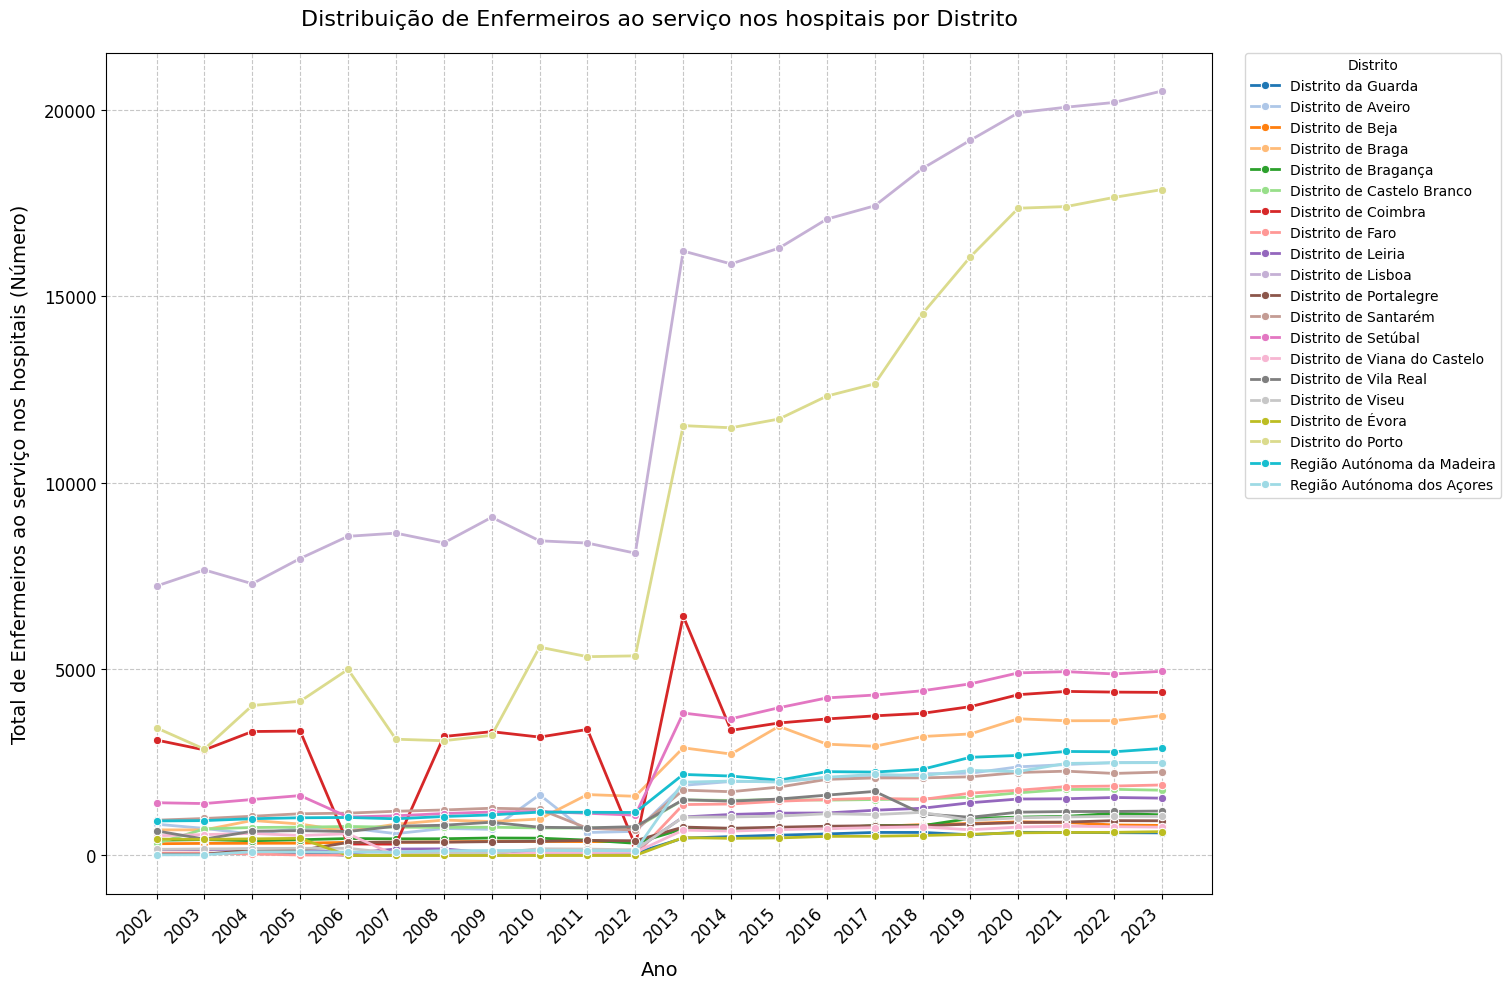

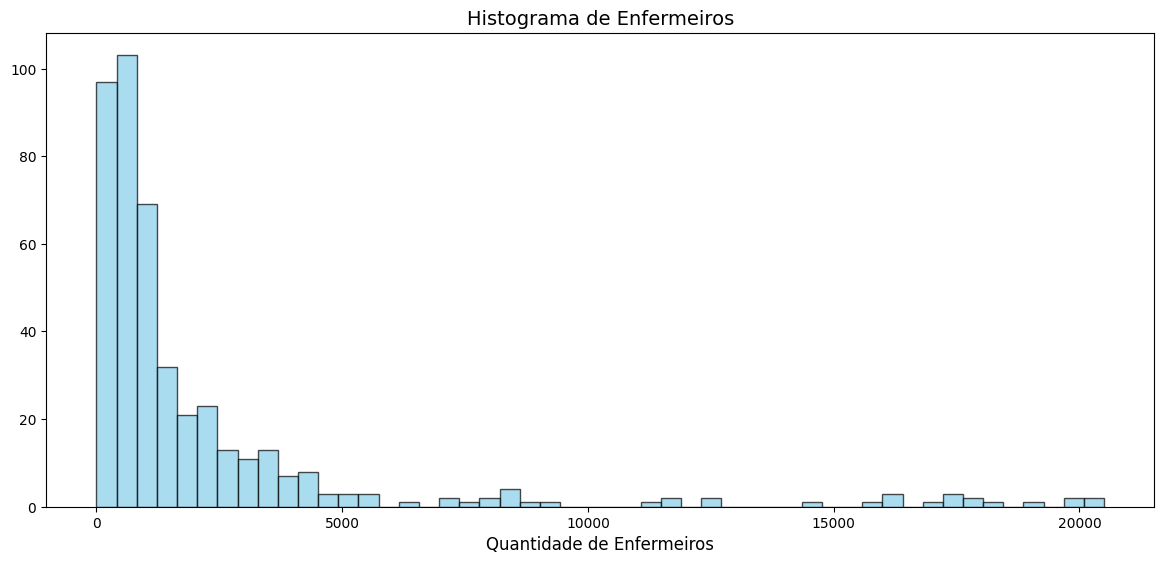

--- Estatísticas para Enfermeiros ---
Média:    2200.8204545454546
Mediana:  963.0


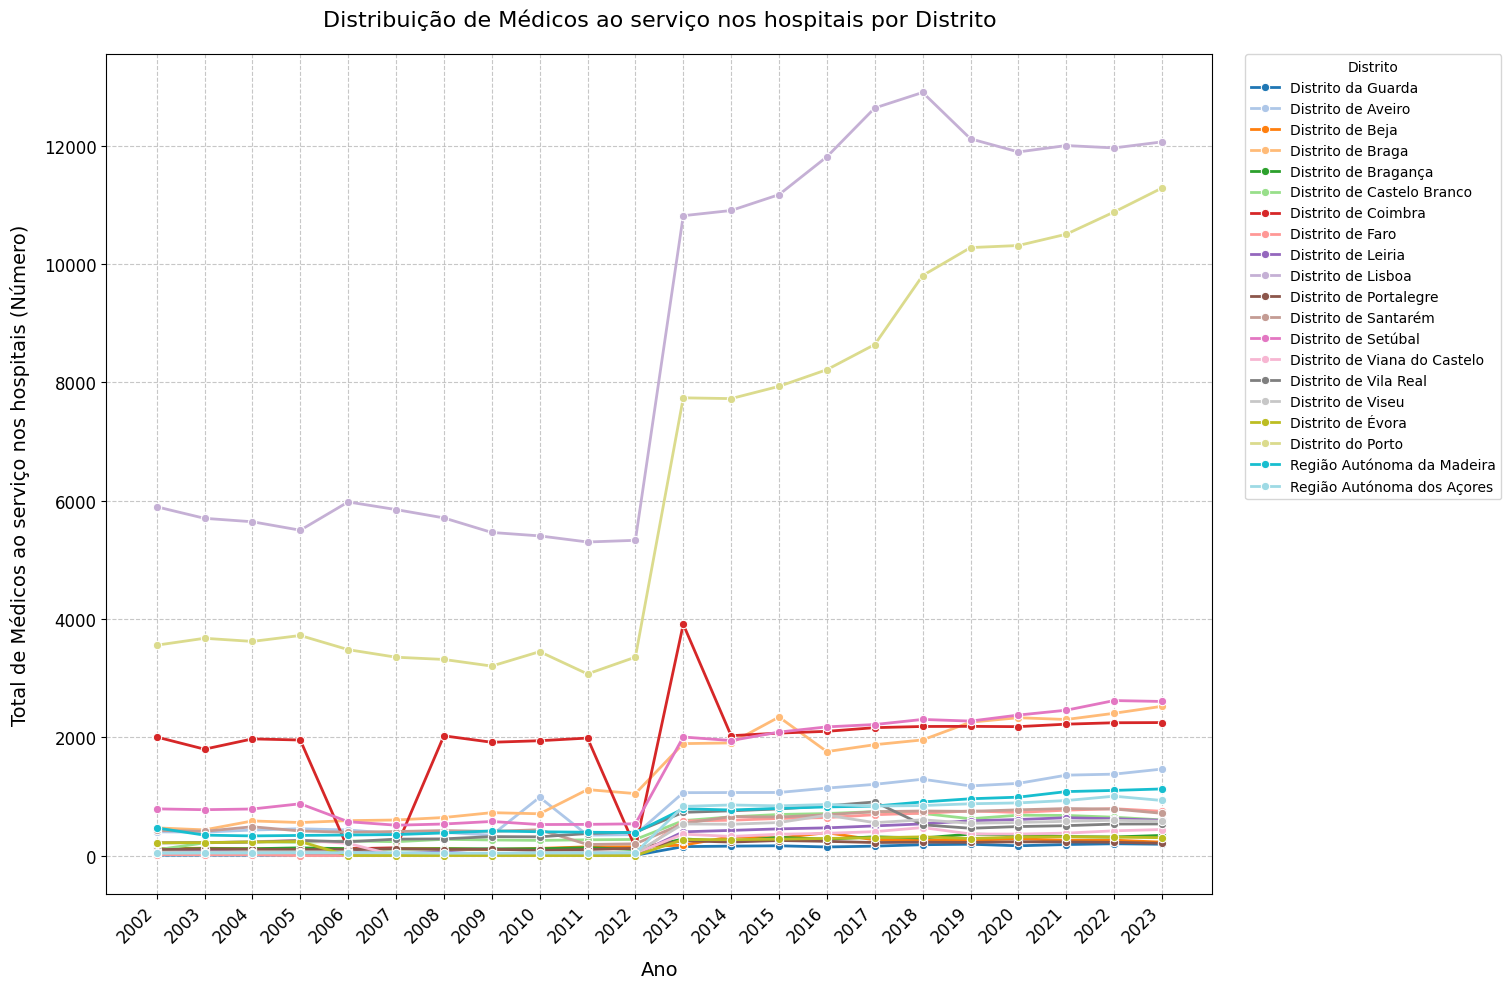

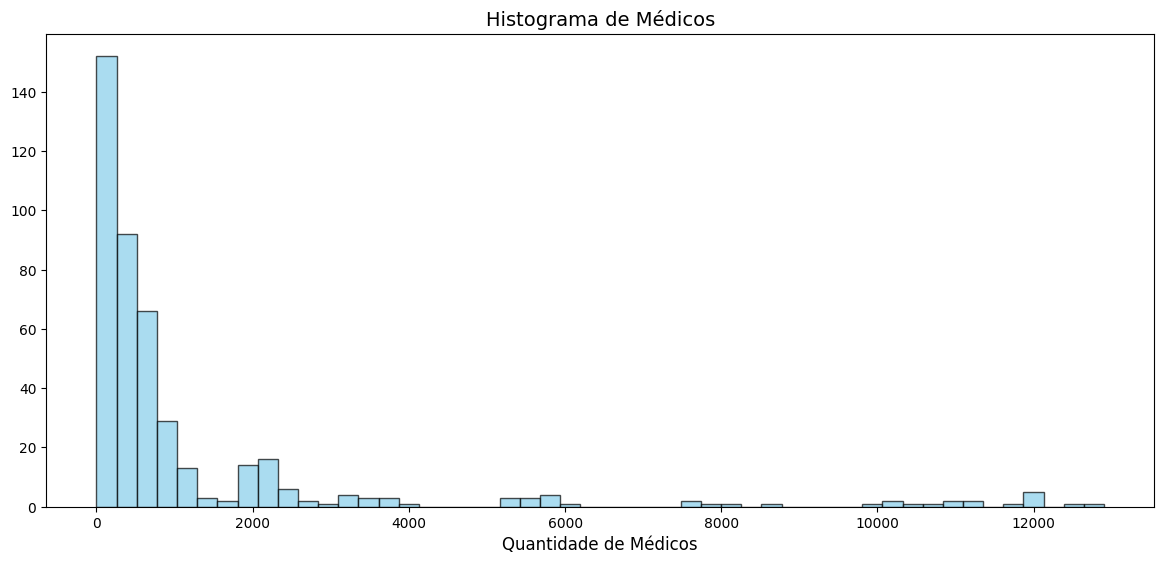

--- Estatísticas para Médicos ---
Média:    1267.8386363636364
Mediana:  409.5


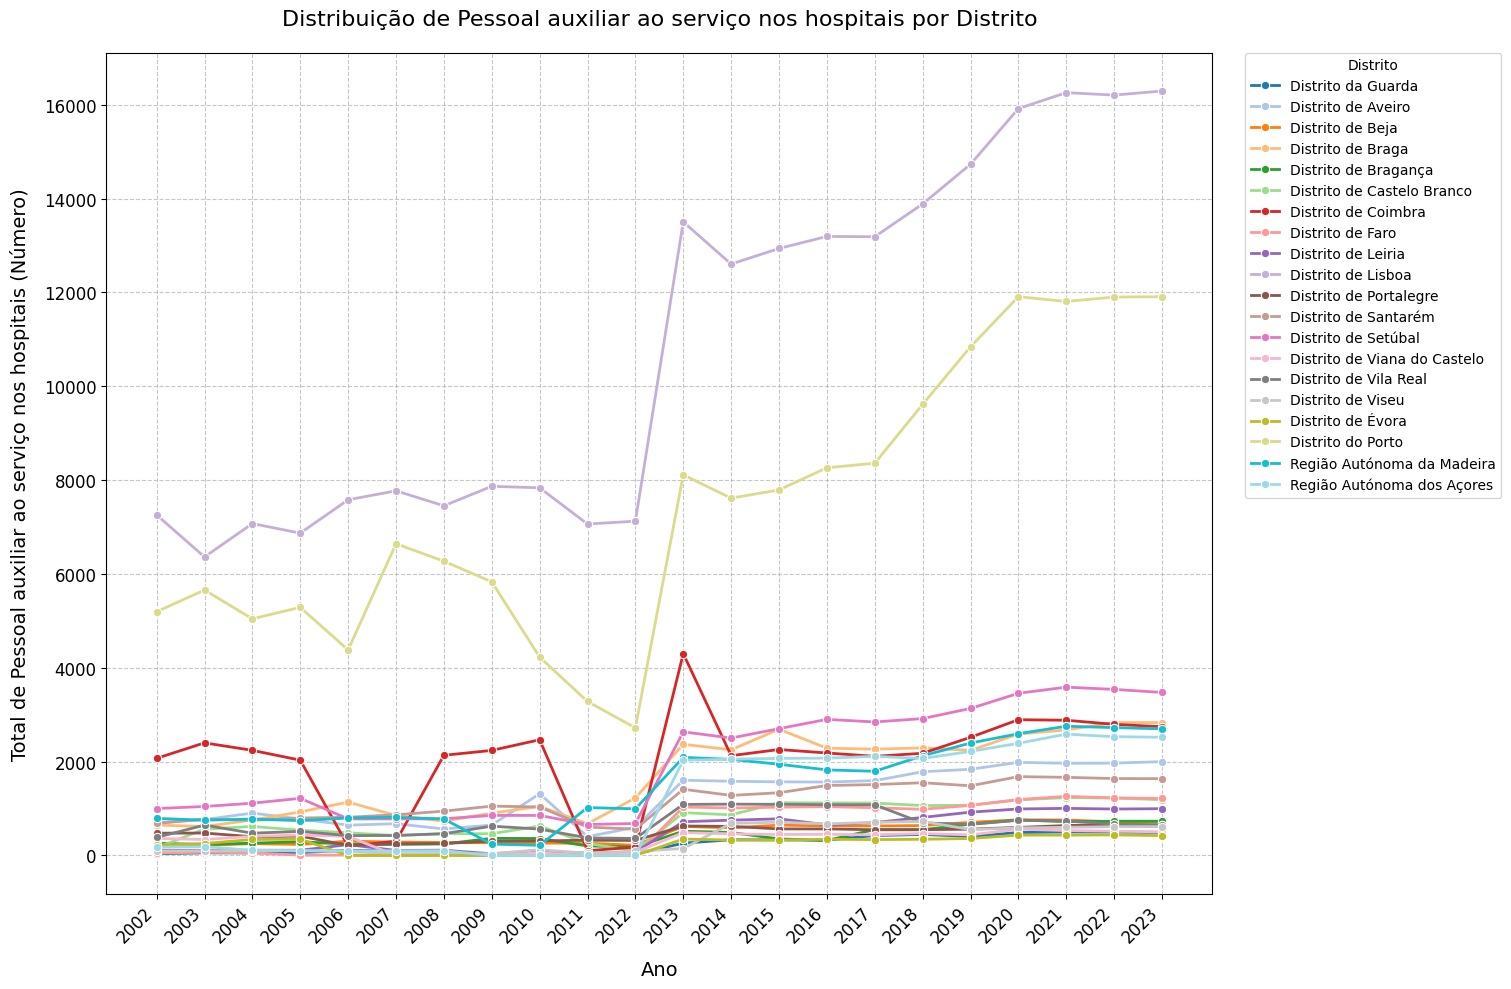

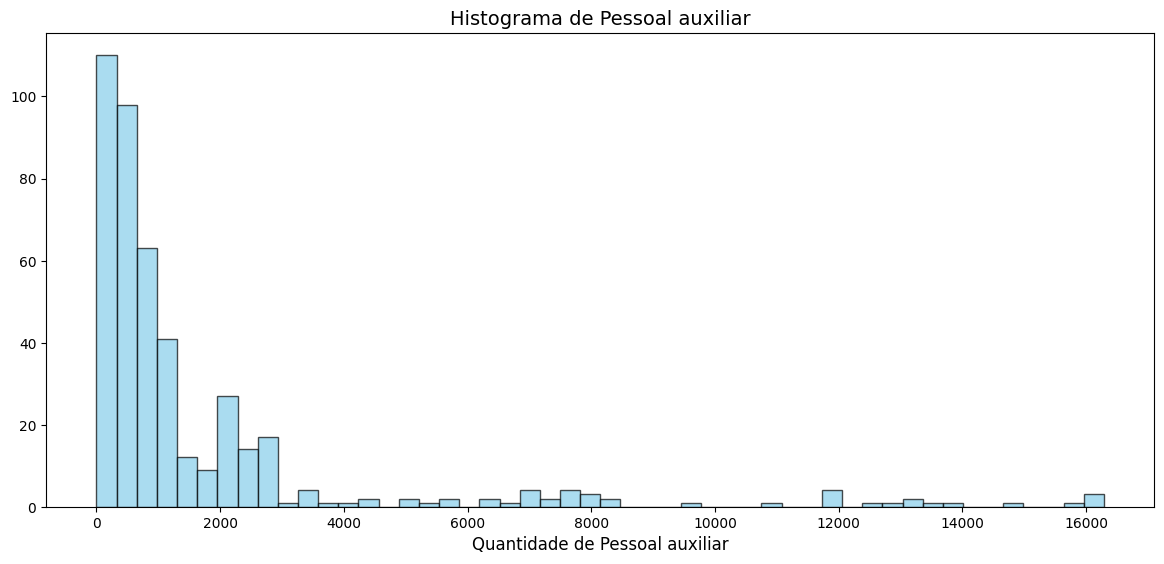

--- Estatísticas para Pessoal auxiliar ---
Média:    1700.5318181818182
Mediana:  684.0


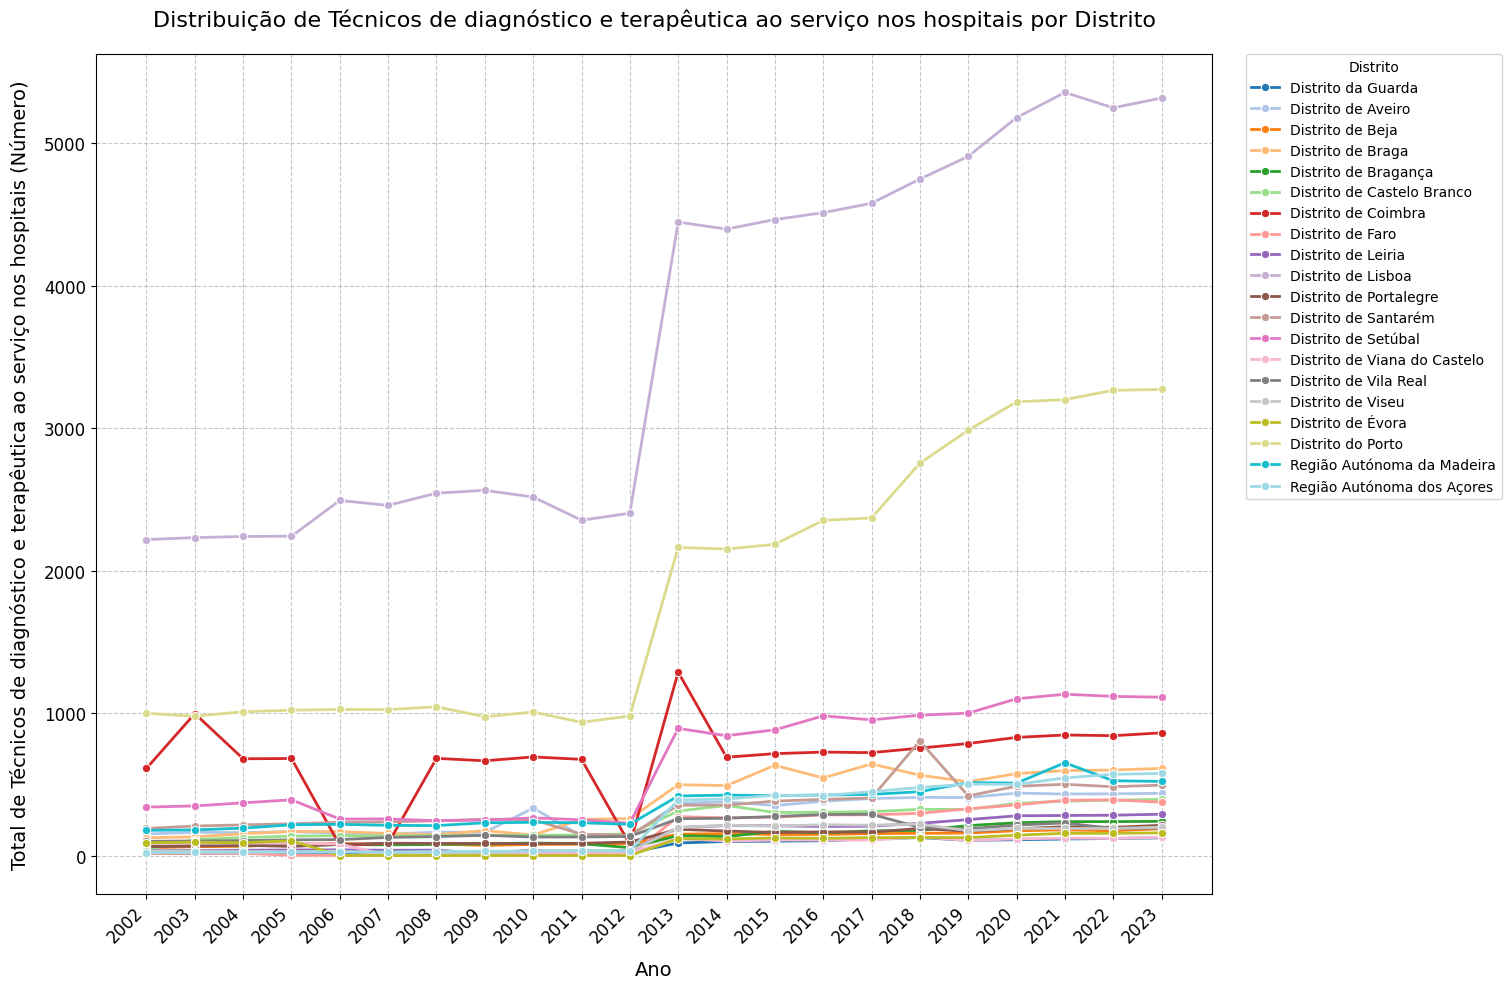

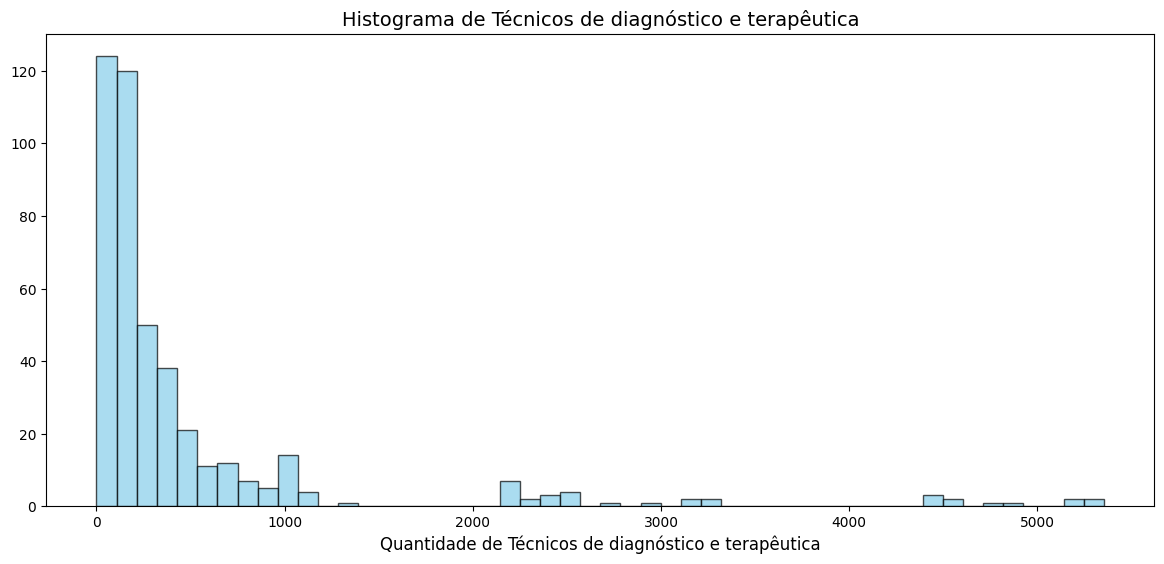

--- Estatísticas para Técnicos de diagnóstico e terapêutica ---
Média:    490.8340909090909
Mediana:  190.0


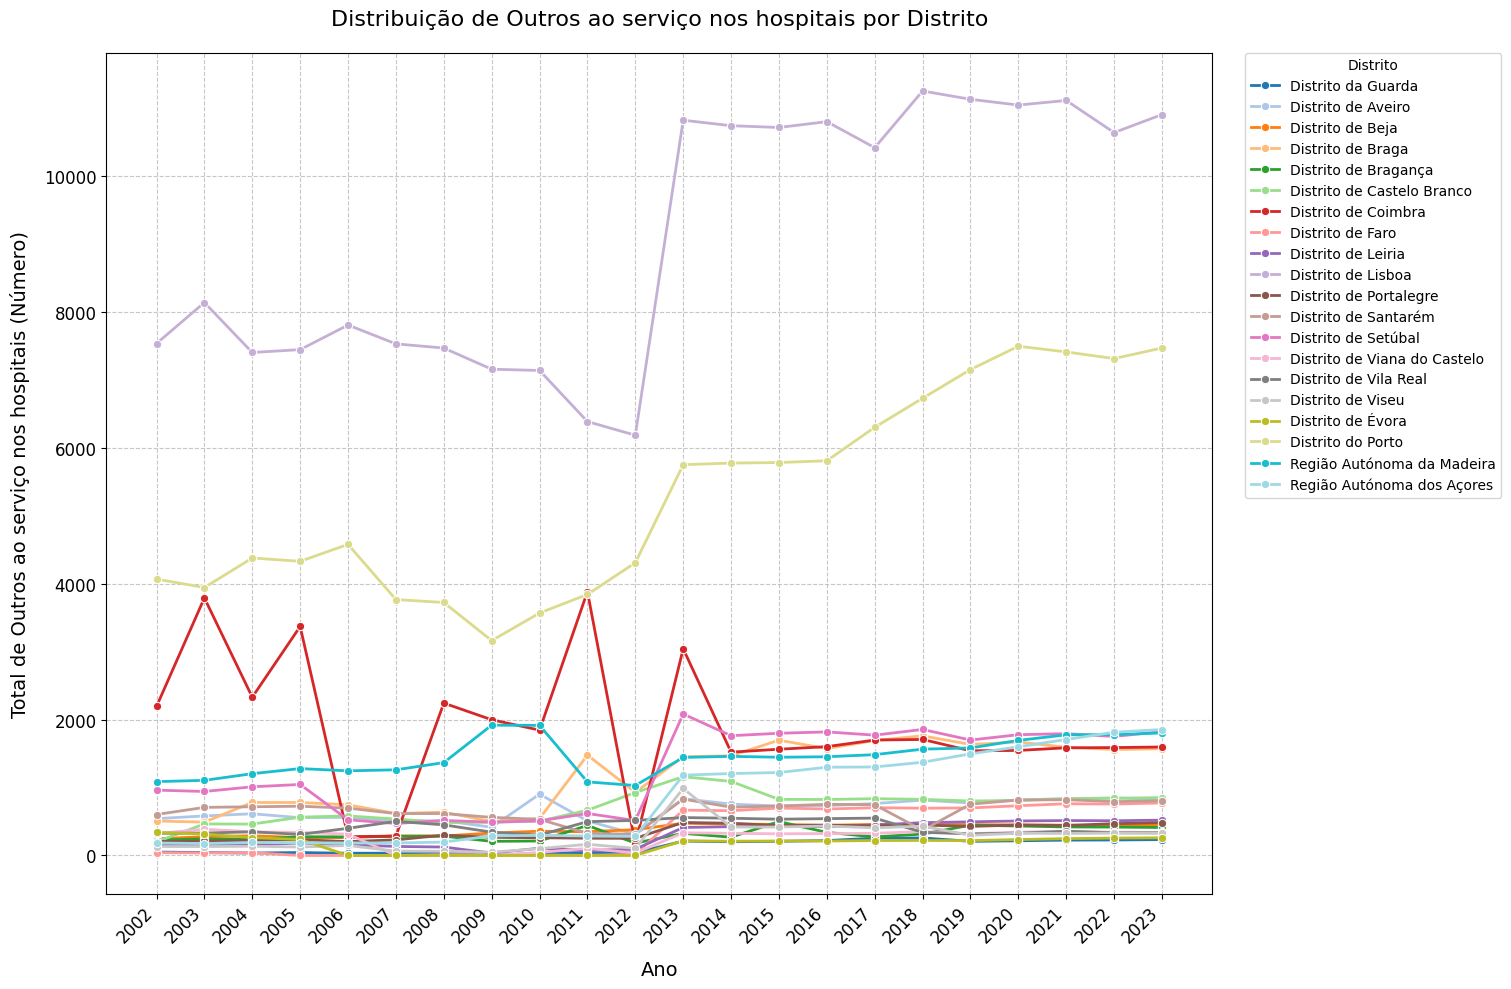

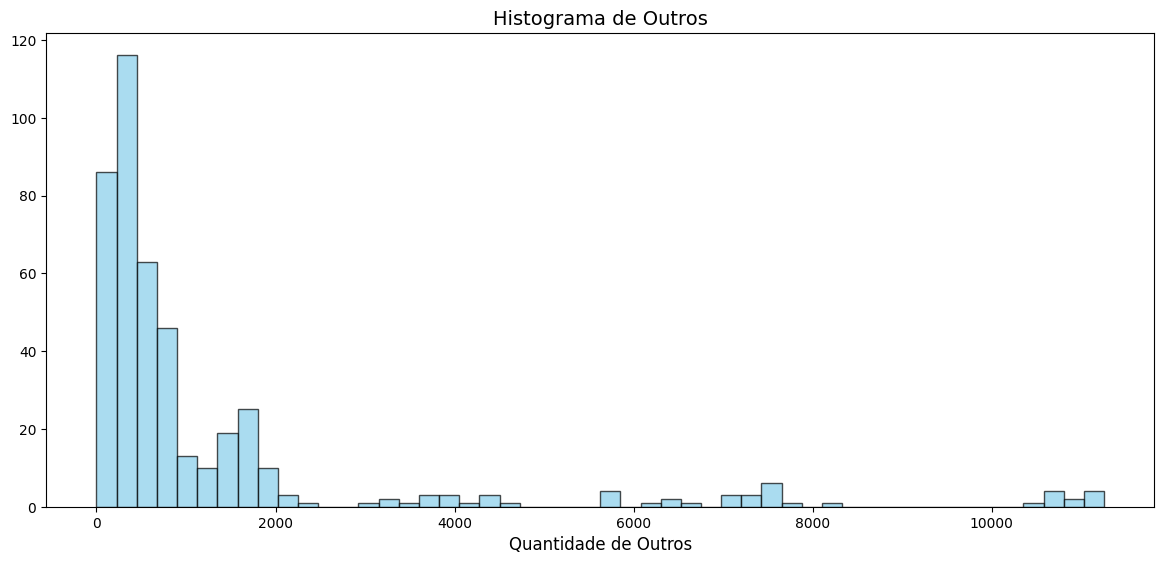

--- Estatísticas para Outros ---
Média:    1297.8
Mediana:  491.0


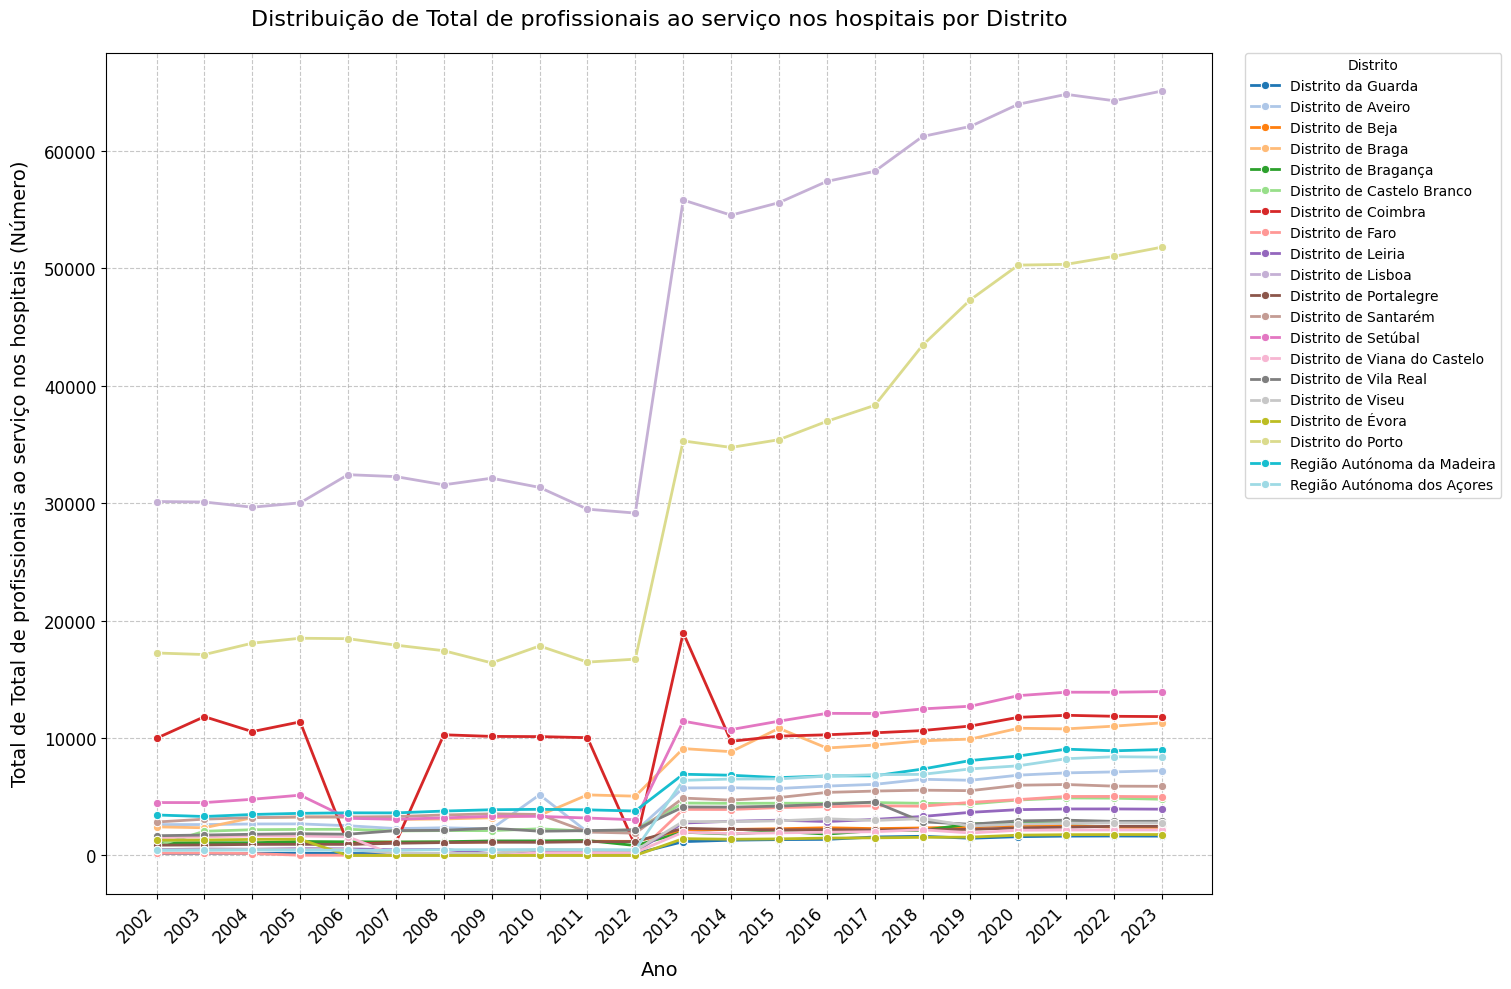

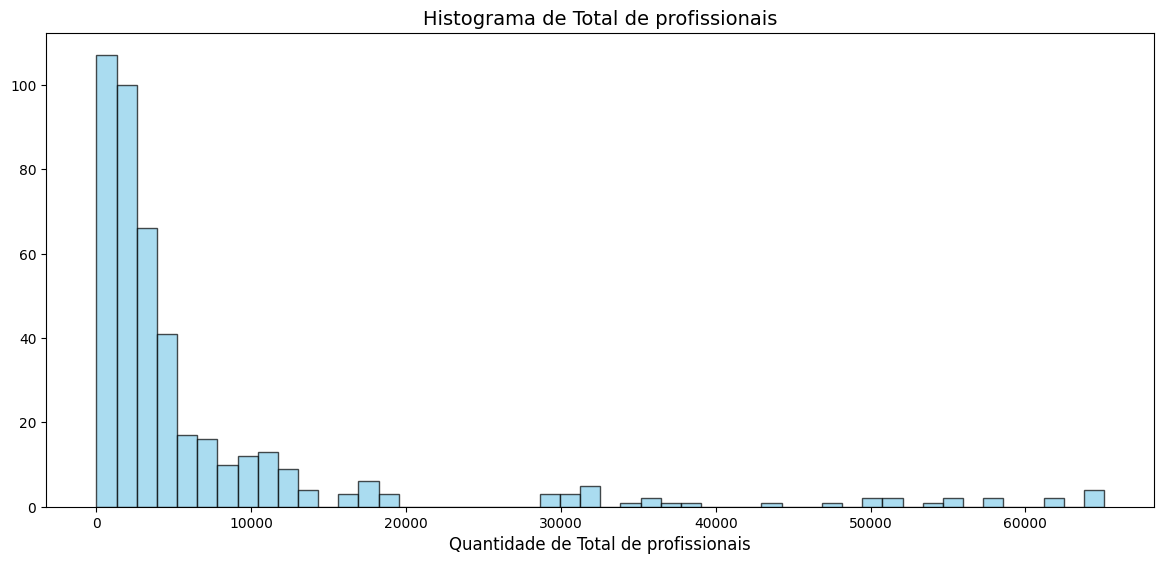

--- Estatísticas para Total ---
Média:    6957.825
Mediana:  2805.0


In [146]:
categorias = ["Enfermeiros", "Médicos", "Pessoal auxiliar", "Técnicos de diagnóstico e terapêutica", "Outros", "Total"]

for categoria in categorias:
    coluna = categoria

    if coluna == "Total":
        nome_exibicao = "Total de profissionais"
    else:
        nome_exibicao = coluna

    # -------------------------------------------------------
    # Gráfico de linha por distrito
    # -------------------------------------------------------
    fig, ax = plt.subplots(figsize=(18, 10))

    sns.lineplot(
        data=df_final,
        x="Ano",
        y=coluna,
        hue="Distrito",
        marker="o",
        linewidth=2,
        palette="tab20",
        ax=ax
    )
    ax.legend(
        title="Distrito",
        bbox_to_anchor=(1.03, 1),
        loc="upper left",
        borderaxespad=0.,
        fontsize=10
    )
    ax.set_title(
        f"Distribuição de {nome_exibicao} ao serviço nos hospitais por Distrito",
        fontsize=16, pad=20
    )
    ax.set_xlabel("Ano", fontsize=14, labelpad=10)
    ax.set_ylabel(
        f"Total de {nome_exibicao} ao serviço nos hospitais (Número)",
        fontsize=14, labelpad=10
    )

    anos_unicos = sorted(df_final["Ano"].unique())
    ax.set_xticks(anos_unicos)
    ax.set_xticklabels(anos_unicos, rotation=45, ha="right", fontsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid(True, linestyle="--", alpha=0.7)

    fig.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()
    plt.close(fig)

    # -------------------------------------------------------
    # Histograma
    # -------------------------------------------------------
    plt.figure(figsize=(12, 6))
    plt.title(f"Histograma de {nome_exibicao}", fontsize=14)
    plt.xlabel(f"Quantidade de {nome_exibicao}", fontsize=12)

    plt.hist(
        df_final[coluna].dropna(),
        bins=50,
        color="skyblue",
        edgecolor="black",
        alpha=0.7
    )

    plt.tight_layout(pad=2.0)
    plt.show()

    # -------------------------------------------------------
    # Estatísticas
    # -------------------------------------------------------
    print(f"--- Estatísticas para {coluna} ---")
    print("Média:   ", df_final[coluna].mean())
    print("Mediana: ", df_final[coluna].median())


#### Evolução da Taxa Bruta de Mortalidade (‰) por Distrito

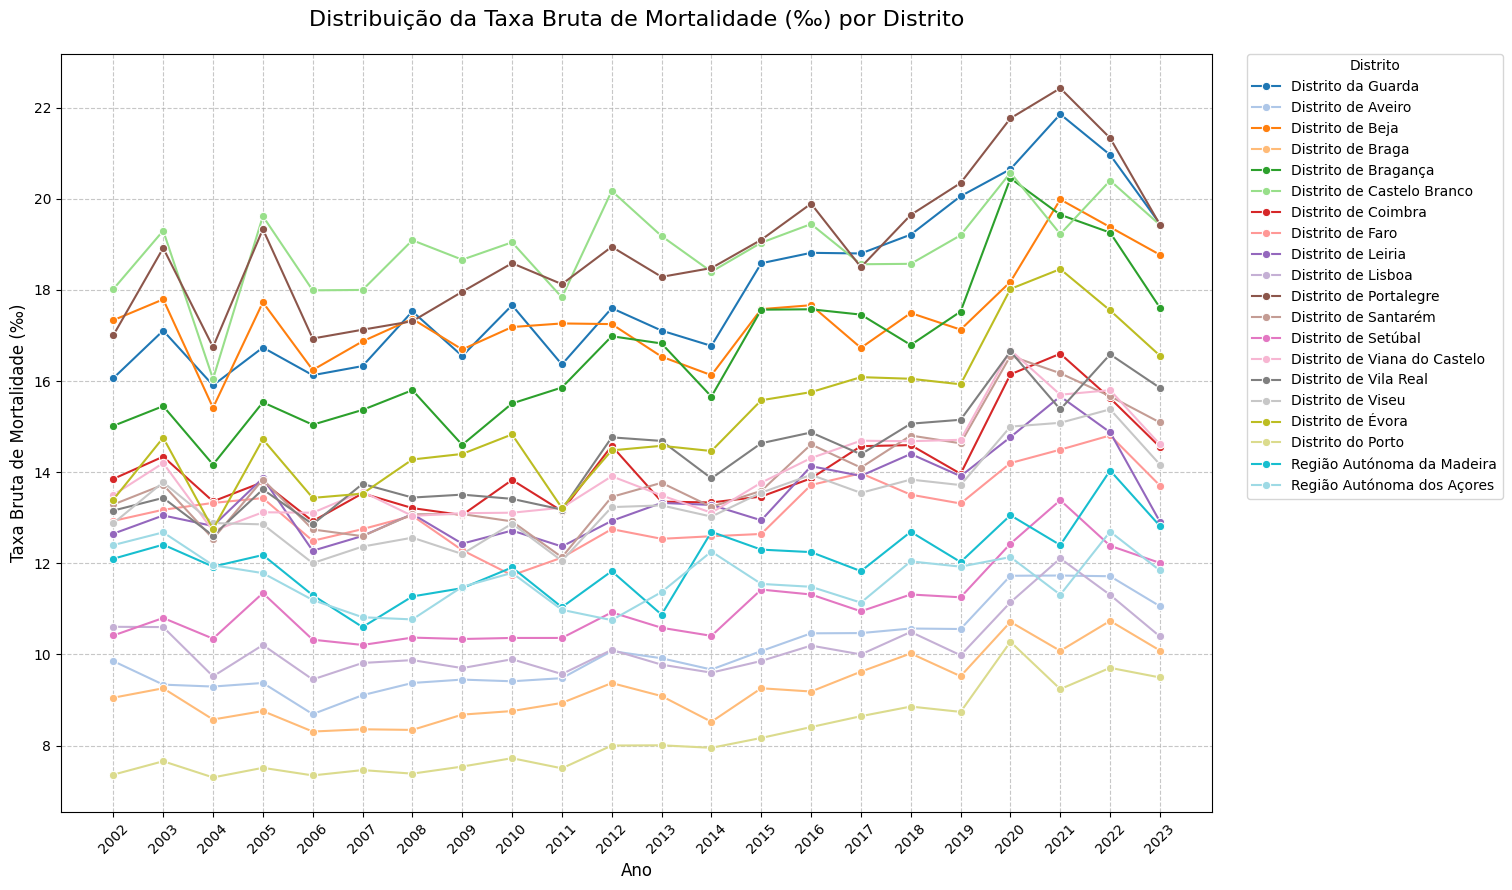

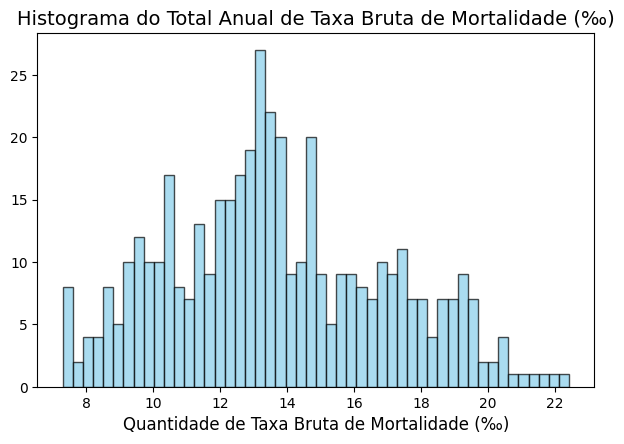

--- Estatísticas para a Taxa Bruta de Mortalidade (‰) ---
Média:    13.682051761947905
Mediana:  13.344117647058823


In [147]:
# -------------------------------------------------------
# Gráfico de linha por distrito
# -------------------------------------------------------
fig, ax = plt.subplots(figsize=(18, 9))

sns.lineplot(data=df_final, x="Ano", y="Taxa Bruta de Mortalidade (‰)", hue="Distrito", marker="o", palette="tab20" , ax=ax)

ax.legend(title="Distrito", bbox_to_anchor=(1.03, 1), loc="upper left", borderaxespad=0.)
ax.set_title("Distribuição da Taxa Bruta de Mortalidade (‰) por Distrito", fontsize=16, pad=20)
ax.set_xlabel("Ano", fontsize=12)
ax.set_ylabel("Taxa Bruta de Mortalidade (‰)", fontsize=12)

anos_unicos = sorted(df_final["Ano"].unique())
ax.set_xticks(anos_unicos)
ax.set_xticklabels(anos_unicos, rotation=45) 
ax.grid(True, linestyle="--", alpha=0.7)

fig.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
plt.close()

# -------------------------------------------------------
# Histograma
# -------------------------------------------------------
plt.title(f"Histograma do Total Anual de Taxa Bruta de Mortalidade (‰)", fontsize=14)
plt.xlabel(f"Quantidade de Taxa Bruta de Mortalidade (‰)", fontsize=12)

plt.hist(df_final["Taxa Bruta de Mortalidade (‰)"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)

plt.tight_layout(pad=2.0)
plt.show()

# -------------------------------------------------------
# Estatísticas
# -------------------------------------------------------
print("--- Estatísticas para a Taxa Bruta de Mortalidade (‰) ---")
print("Média:   ", df_final["Taxa Bruta de Mortalidade (‰)"].mean())
print("Mediana: ", df_final["Taxa Bruta de Mortalidade (‰)"].median())

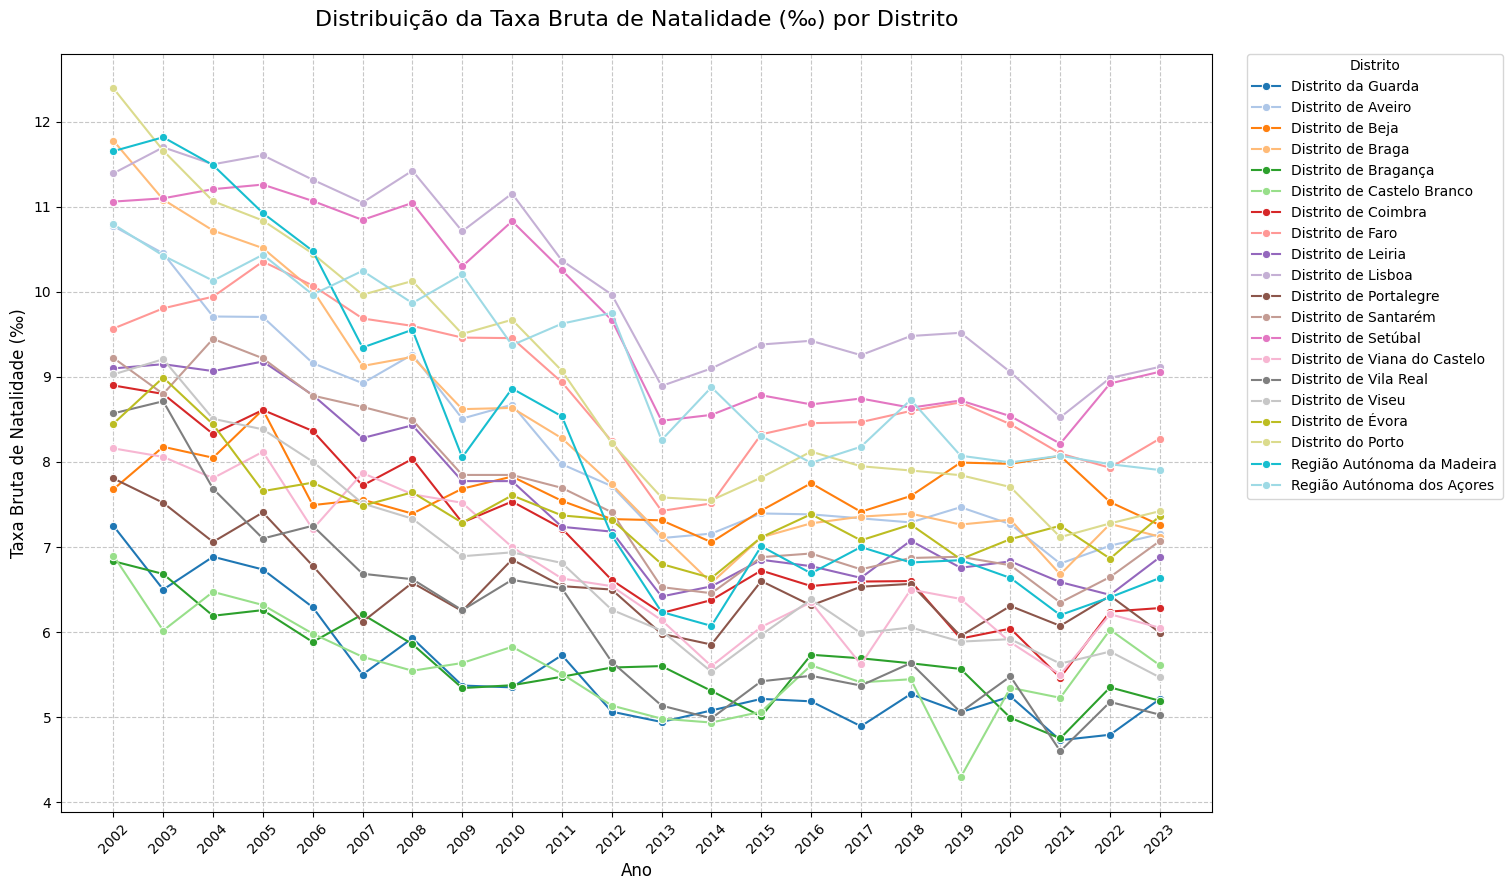

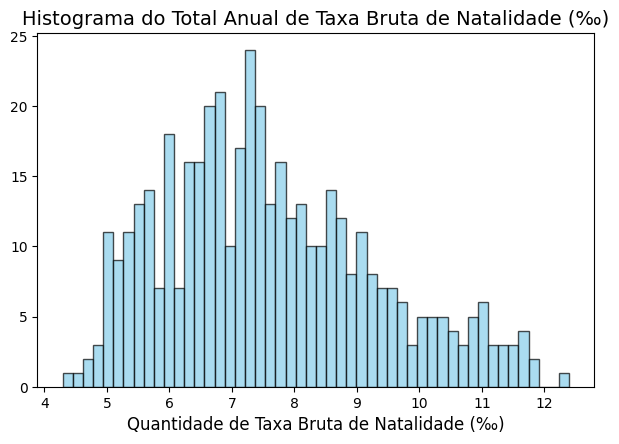

--- Estatísticas para a Taxa Bruta de Natalidade (‰) ---
Média:    7.602400393647772
Mediana:  7.360714285714286


In [148]:
# -------------------------------------------------------
# Gráfico de linha por distrito
# -------------------------------------------------------
fig, ax = plt.subplots(figsize=(18, 9))

sns.lineplot(data=df_final, x="Ano", y="Taxa Bruta de Natalidade (‰)", hue="Distrito", marker="o", palette="tab20", ax=ax)

ax.legend(title="Distrito", bbox_to_anchor=(1.03, 1), loc="upper left", borderaxespad=0.)
ax.set_title(f"Distribuição da Taxa Bruta de Natalidade (‰) por Distrito", fontsize=16, pad=20)
ax.set_xlabel("Ano", fontsize=12)
ax.set_ylabel("Taxa Bruta de Natalidade (‰)", fontsize=12)

anos_unicos = sorted(df_final["Ano"].unique())
ax.set_xticks(anos_unicos)
ax.set_xticklabels(anos_unicos, rotation=45) 
ax.grid(True, linestyle="--", alpha=0.7)

fig.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
plt.close()

# -------------------------------------------------------
# Histograma
# -------------------------------------------------------
plt.title(f"Histograma do Total Anual de Taxa Bruta de Natalidade (‰)", fontsize=14)
plt.xlabel(f"Quantidade de Taxa Bruta de Natalidade (‰)", fontsize=12)

plt.hist(df_final["Taxa Bruta de Natalidade (‰)"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)

plt.tight_layout(pad=2.0)
plt.show()

# -------------------------------------------------------
# Estatísticas
# -------------------------------------------------------
print("--- Estatísticas para a Taxa Bruta de Natalidade (‰) ---")
print("Média:   ", df_final["Taxa Bruta de Natalidade (‰)"].mean())
print("Mediana: ", df_final["Taxa Bruta de Natalidade (‰)"].median())

#### Metricas de saúde por distrito

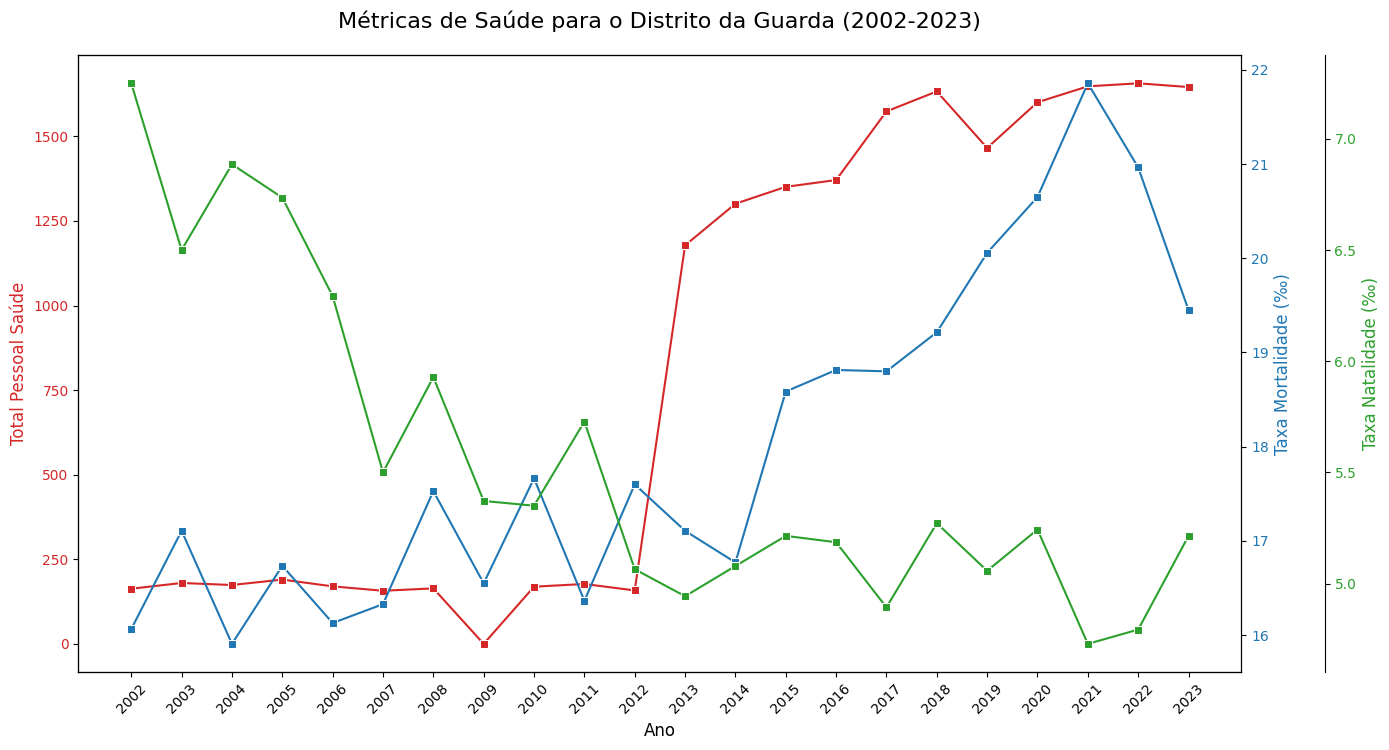

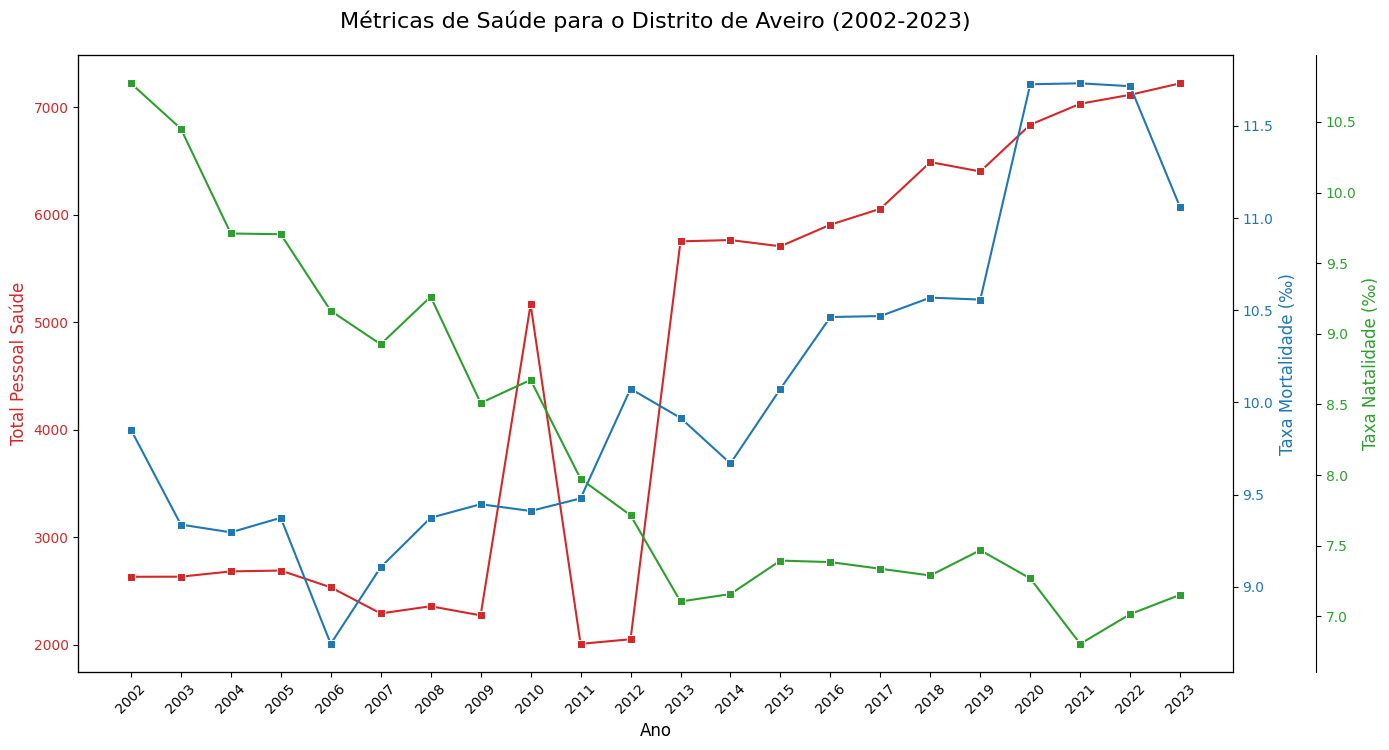

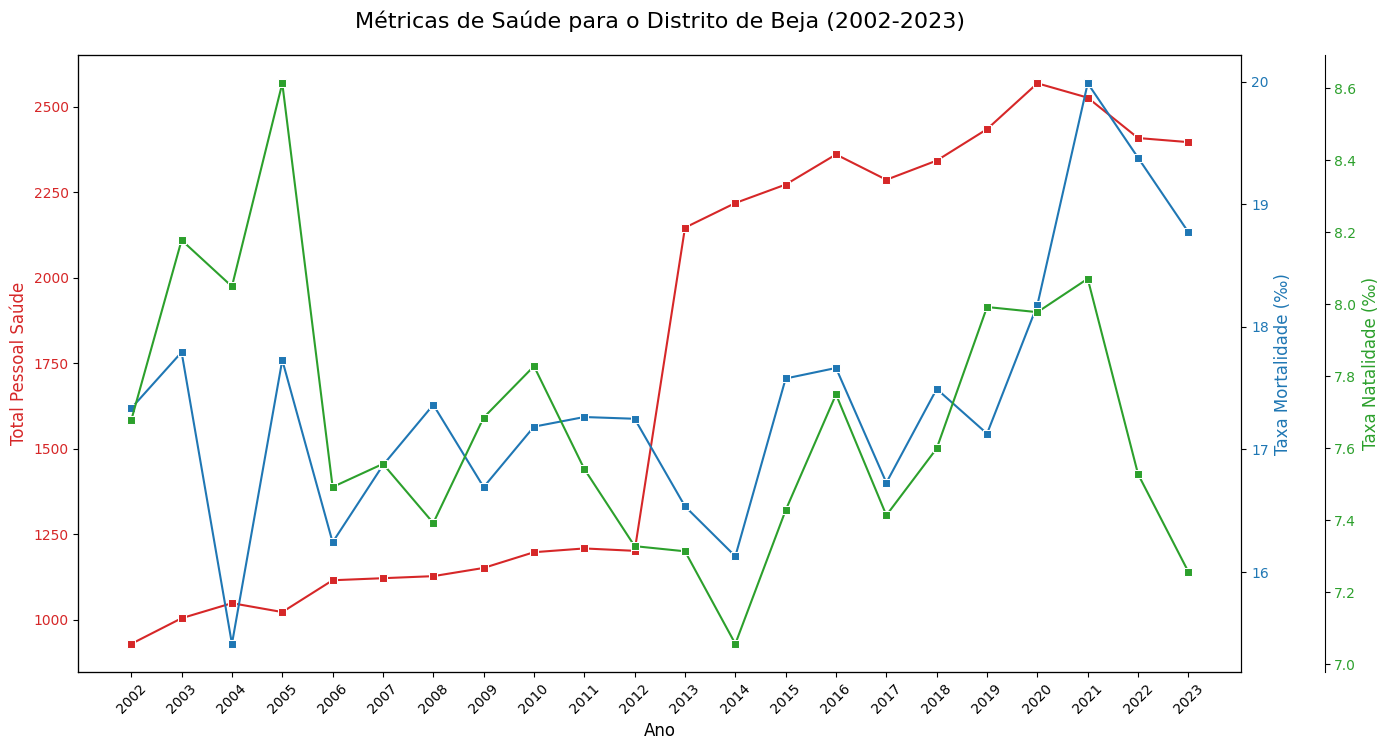

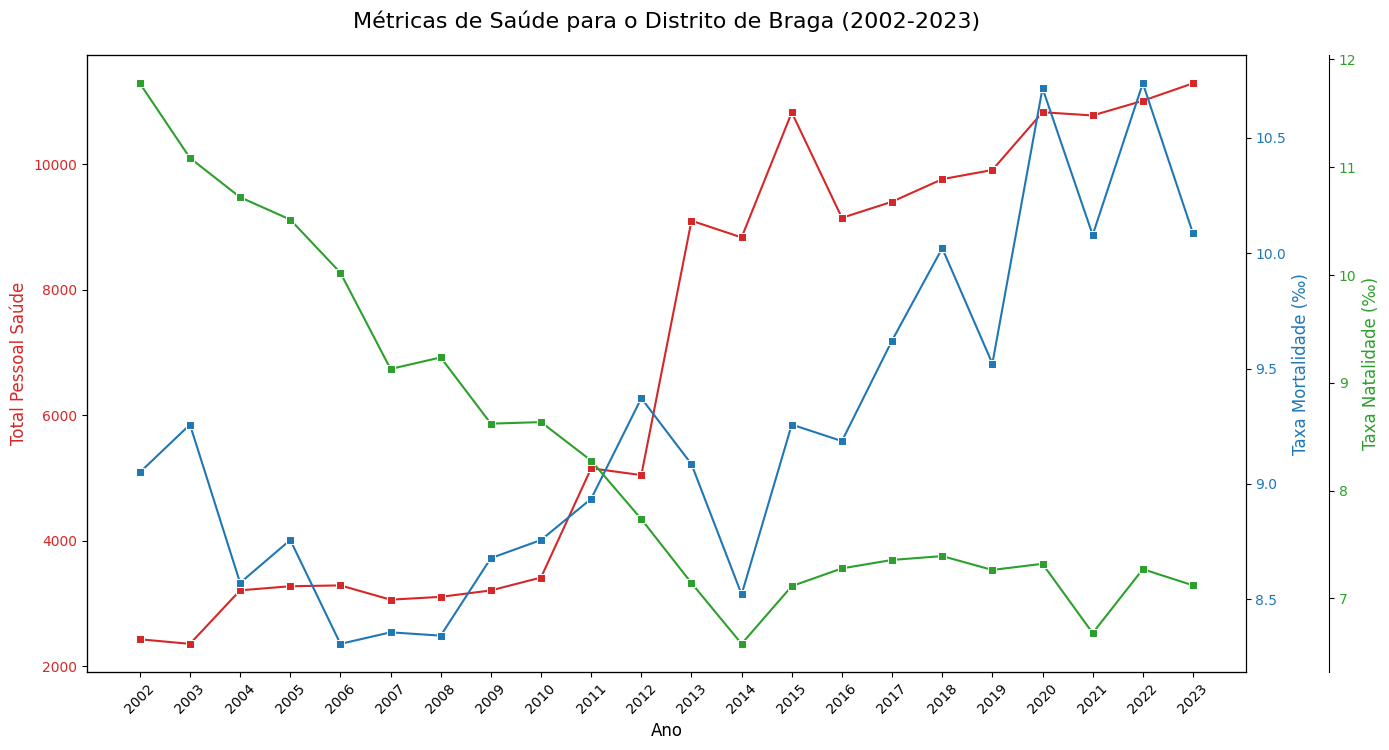

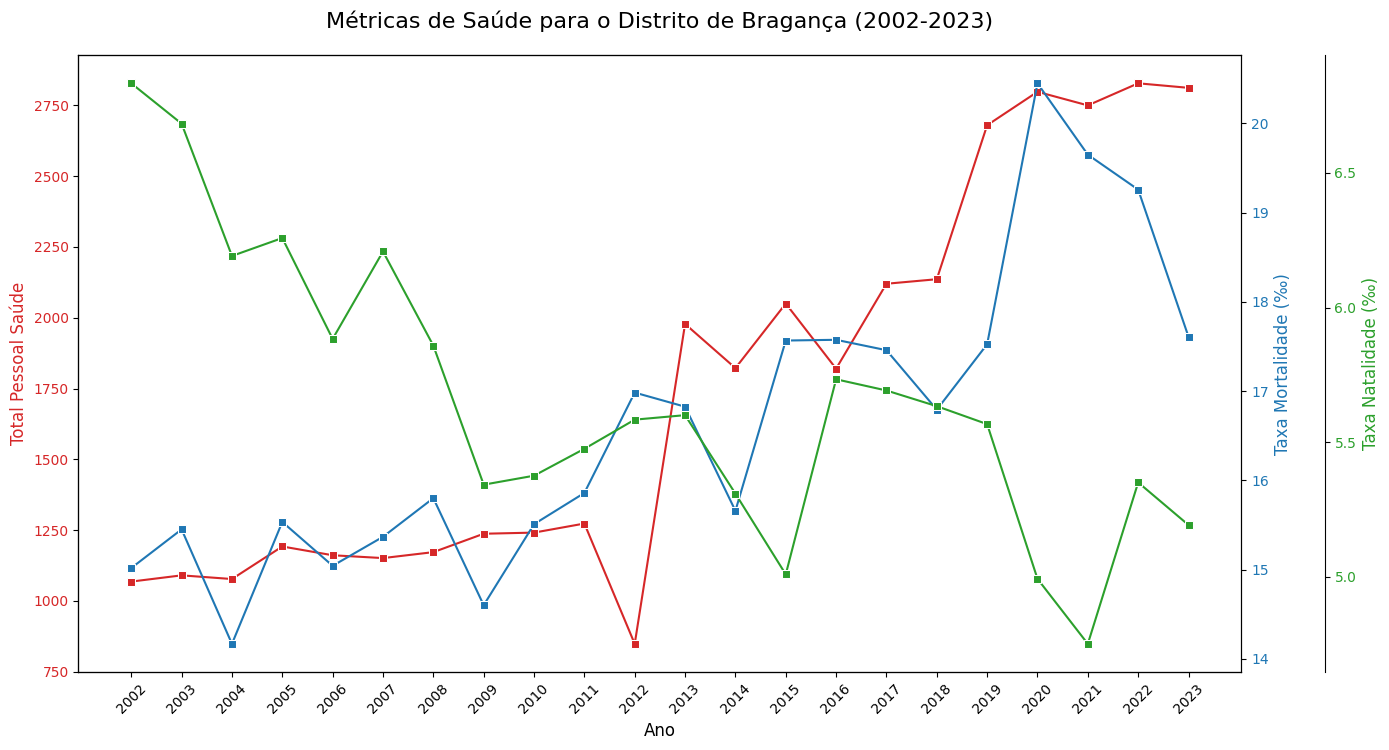

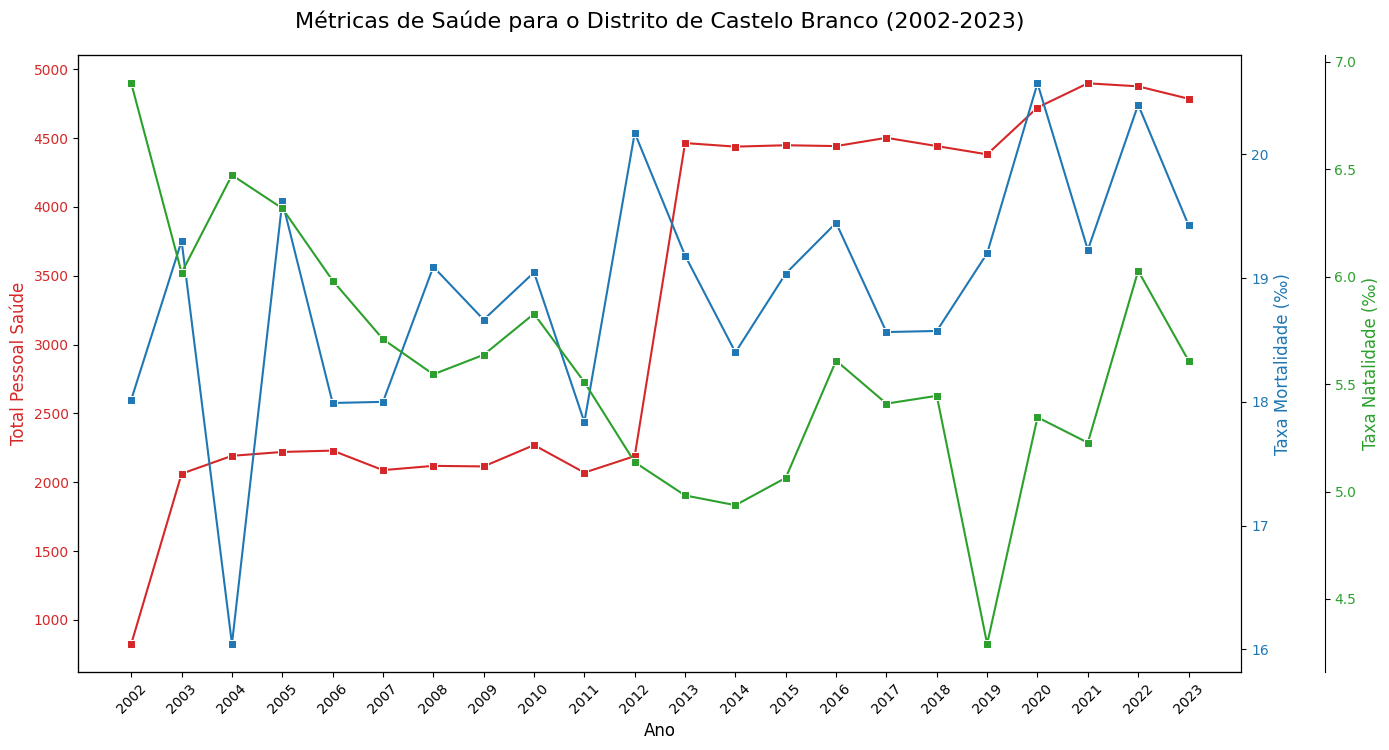

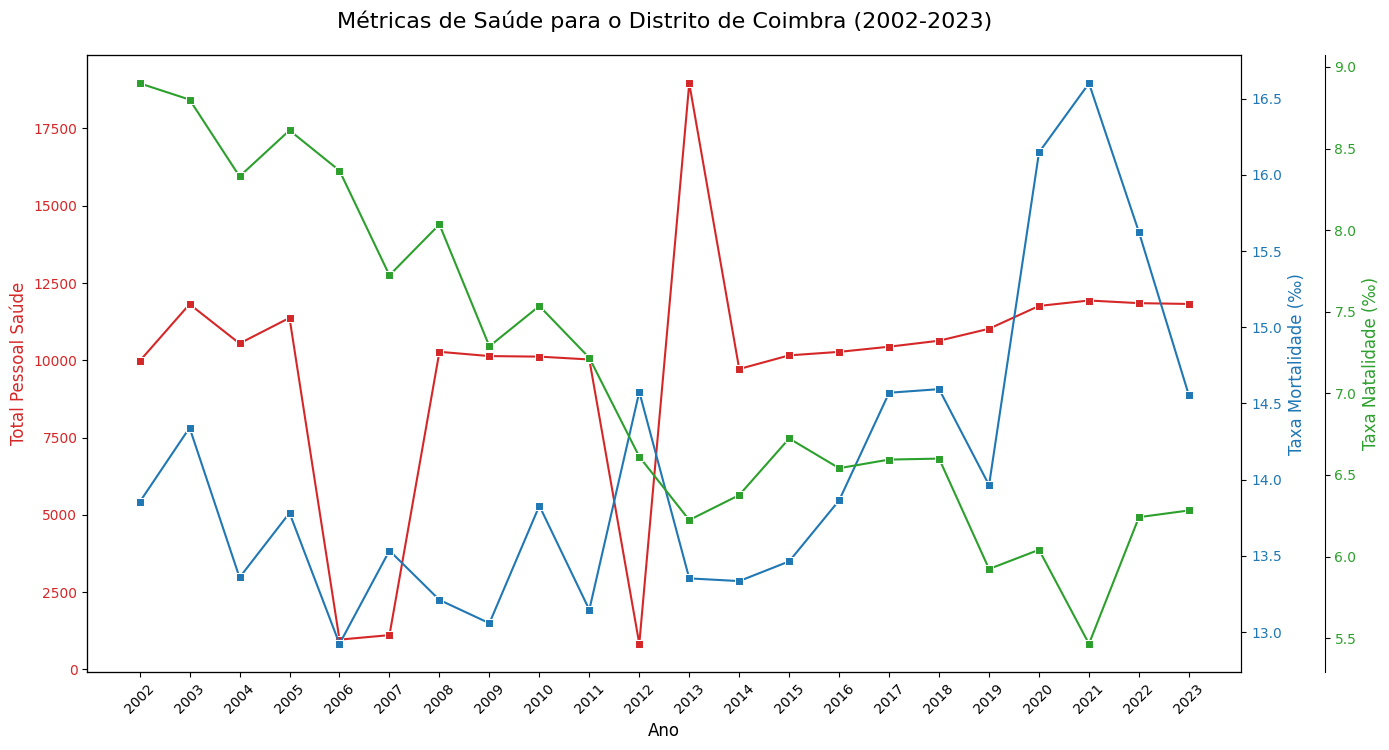

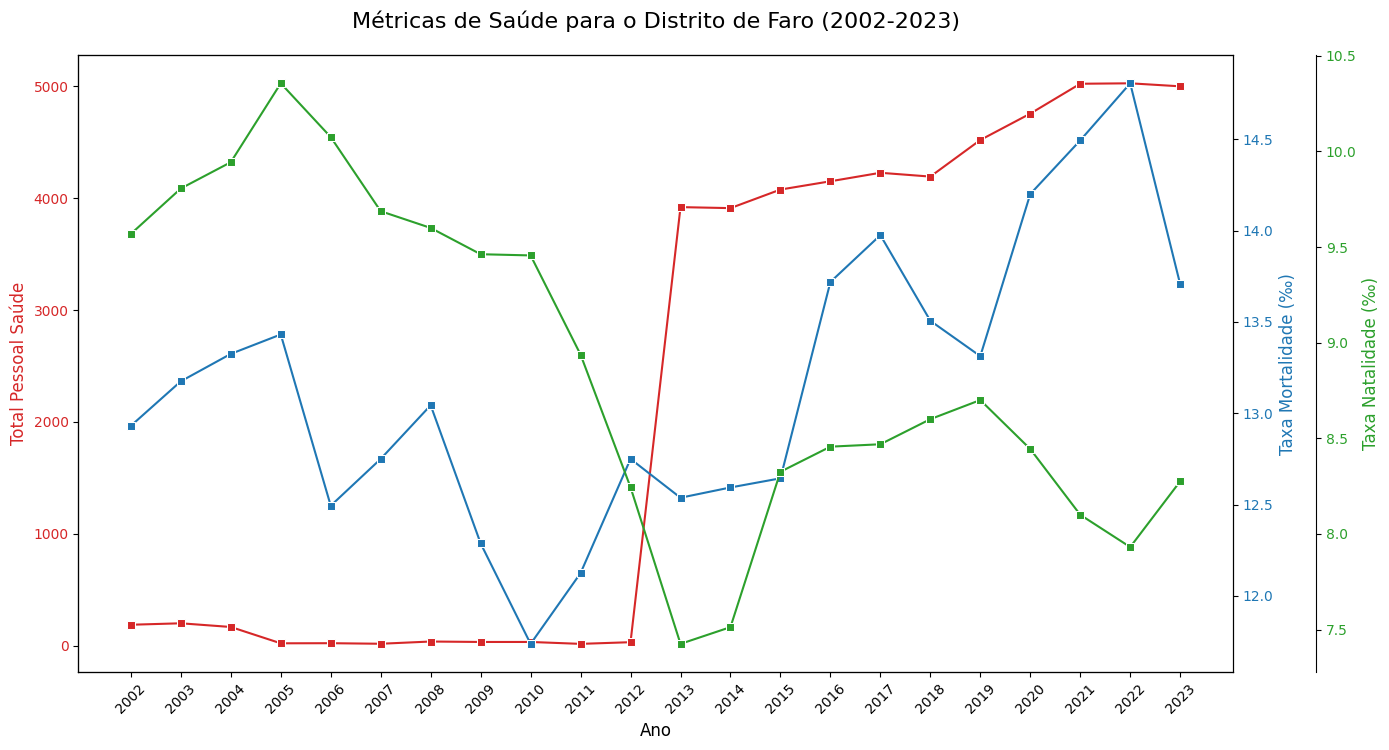

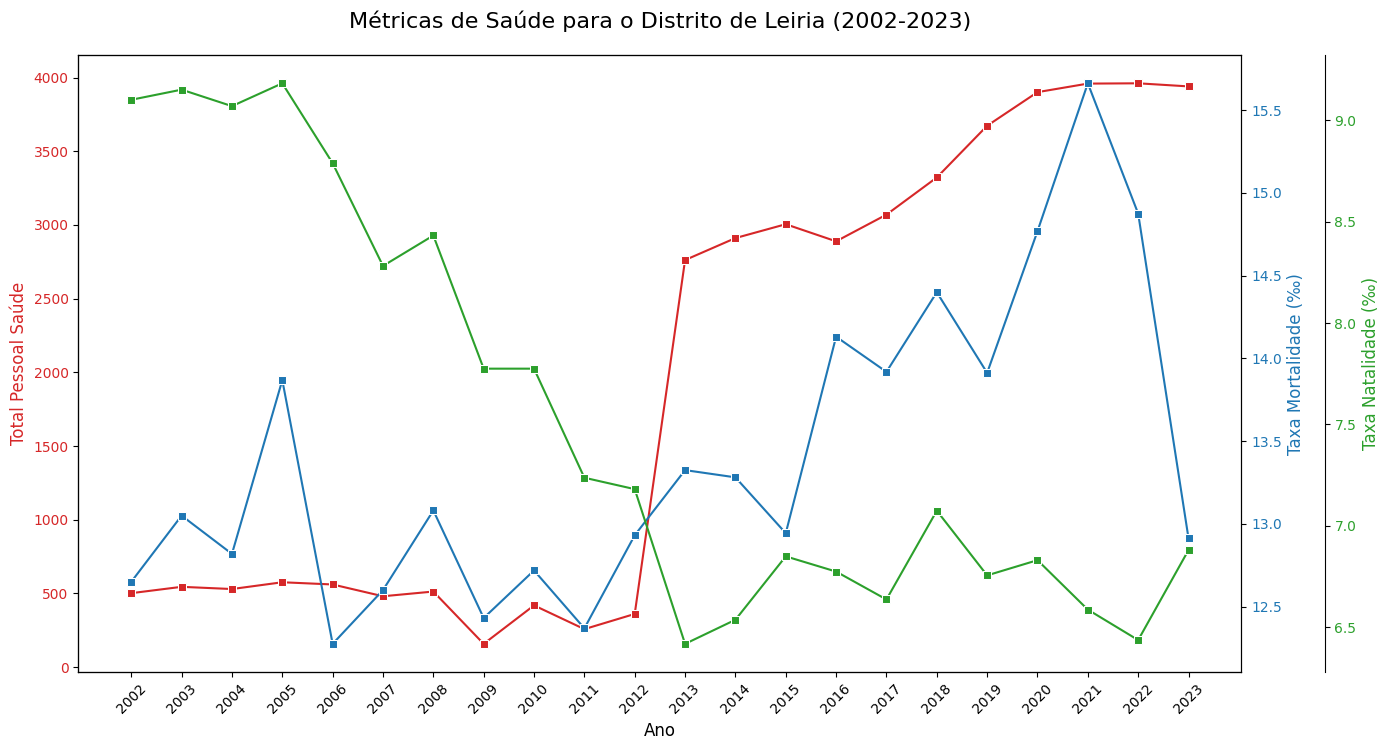

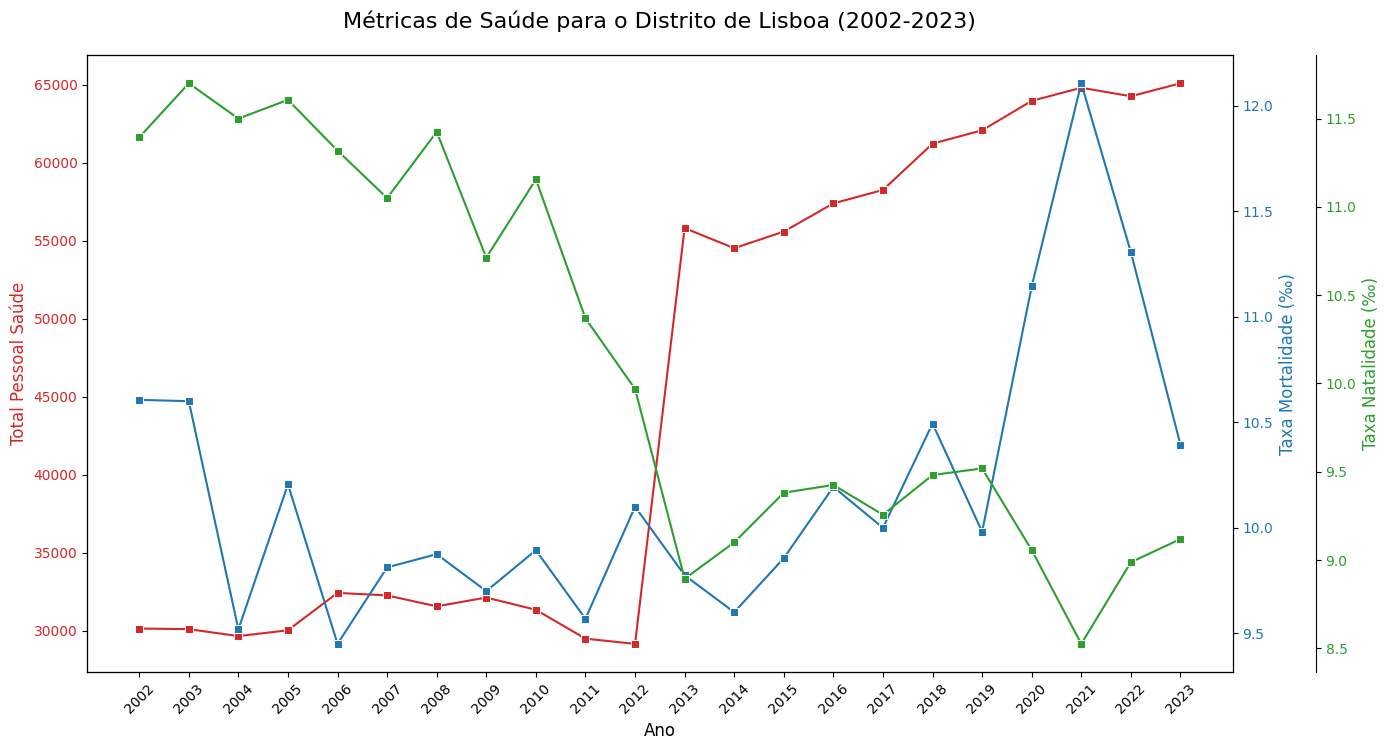

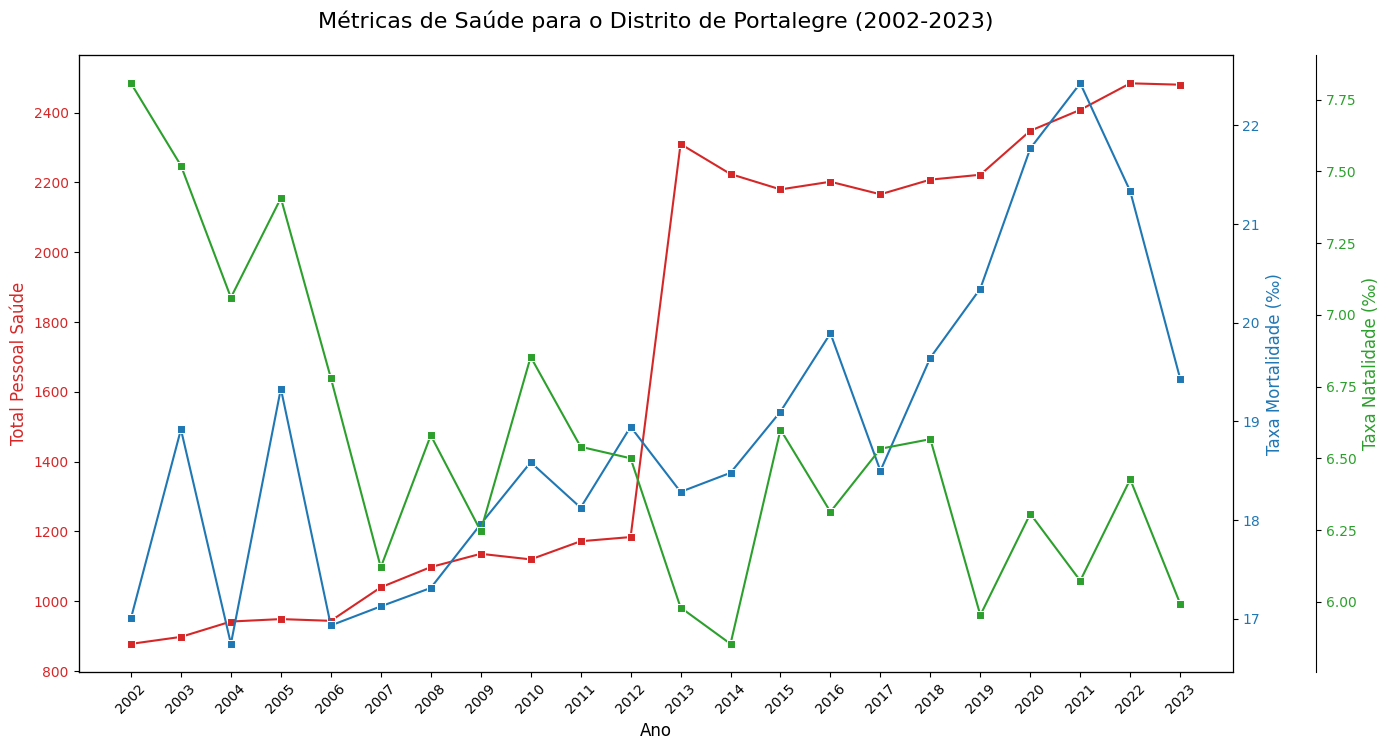

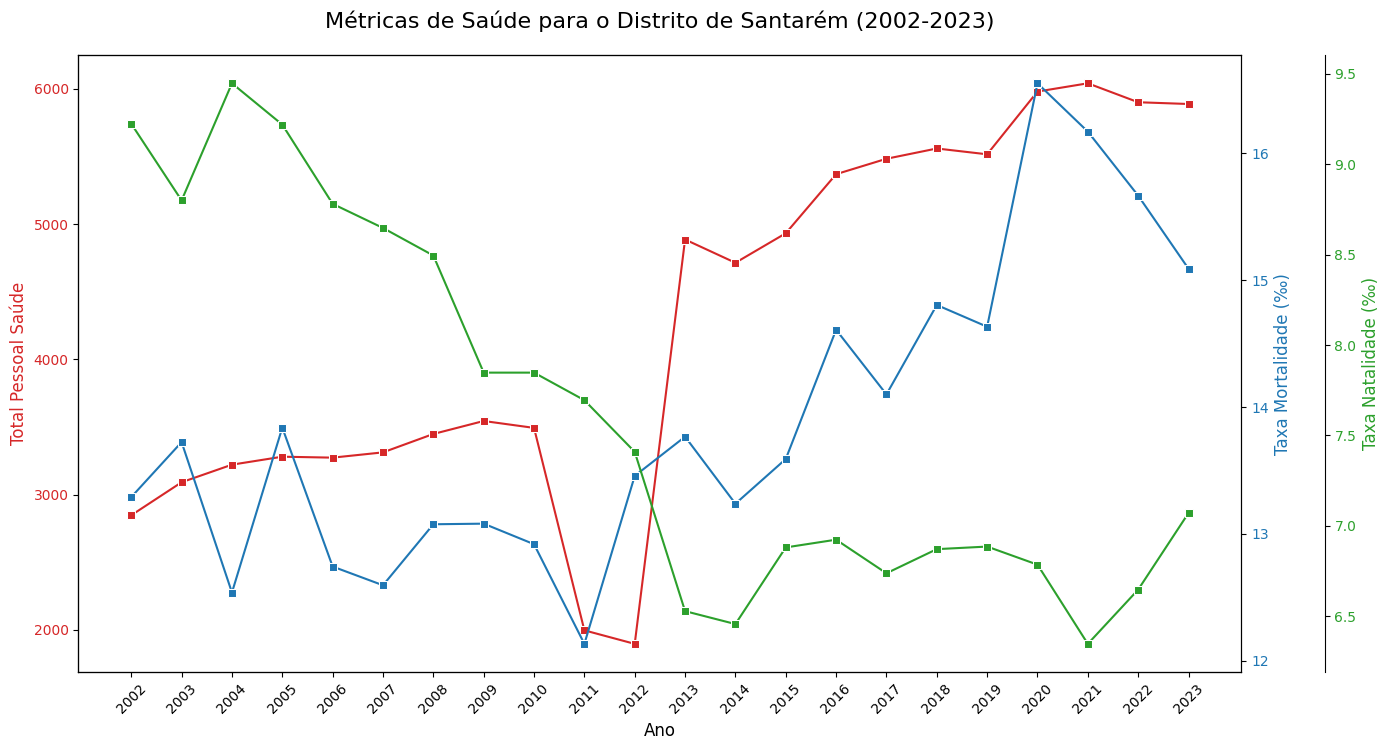

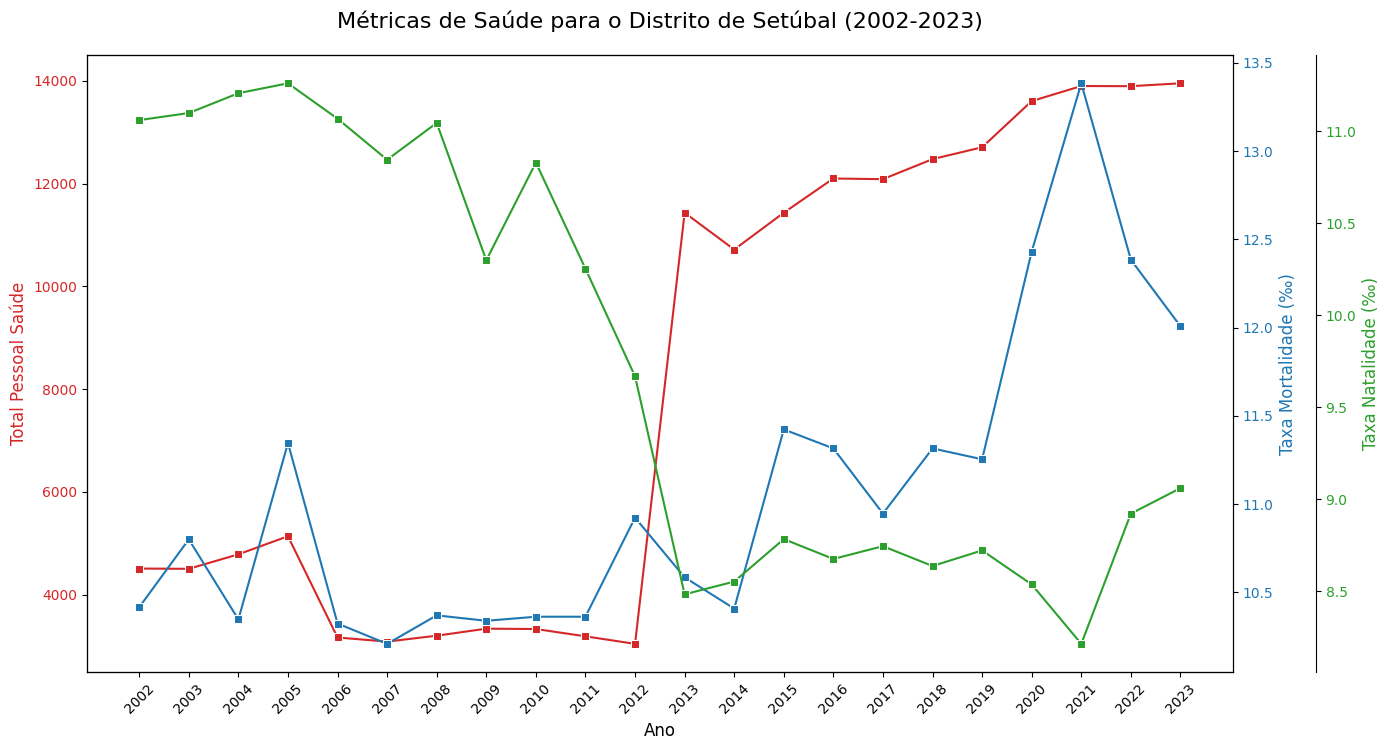

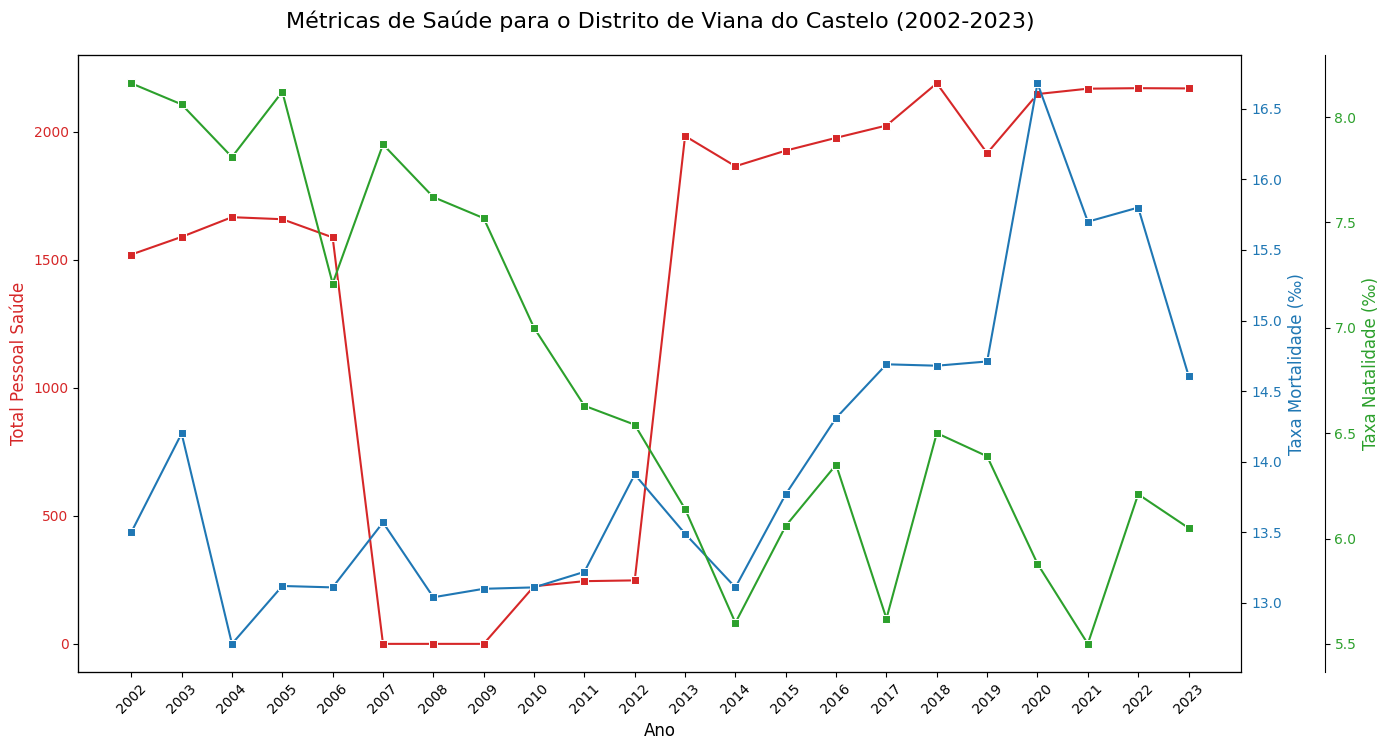

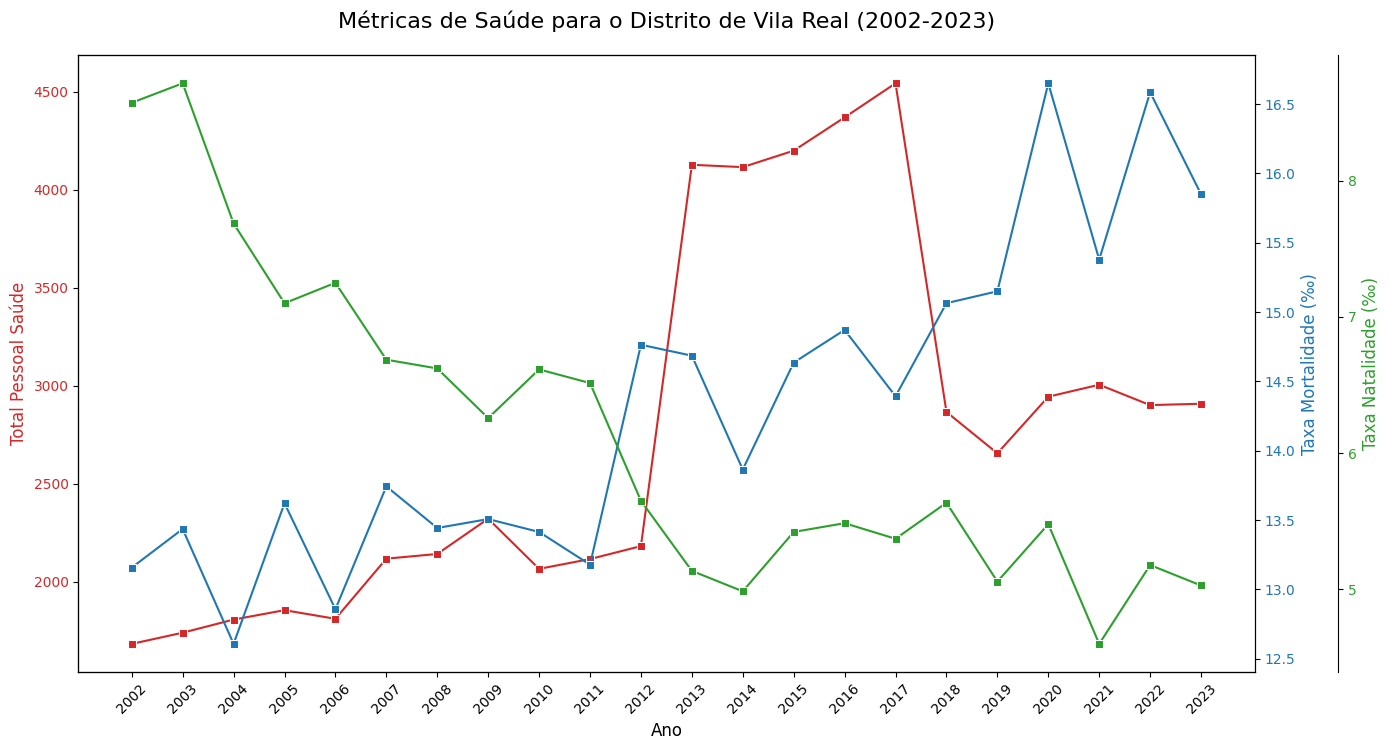

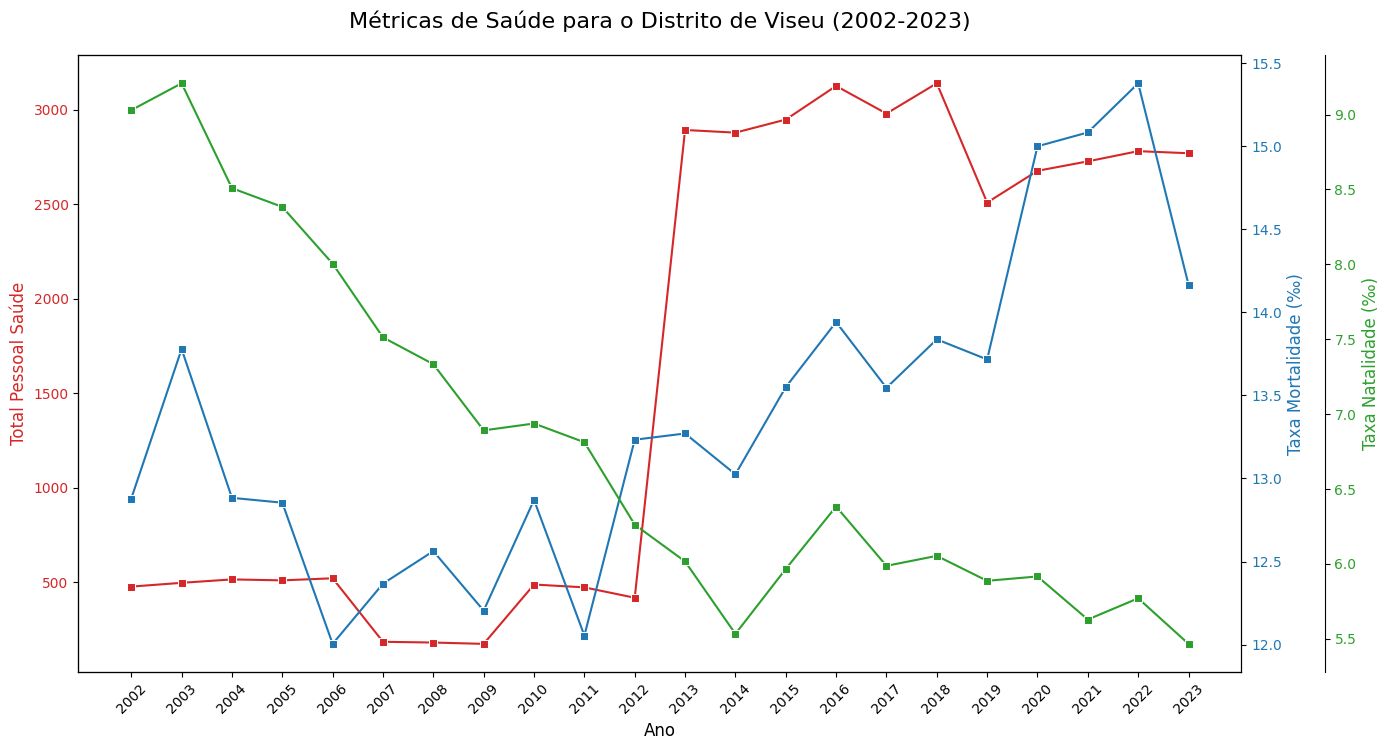

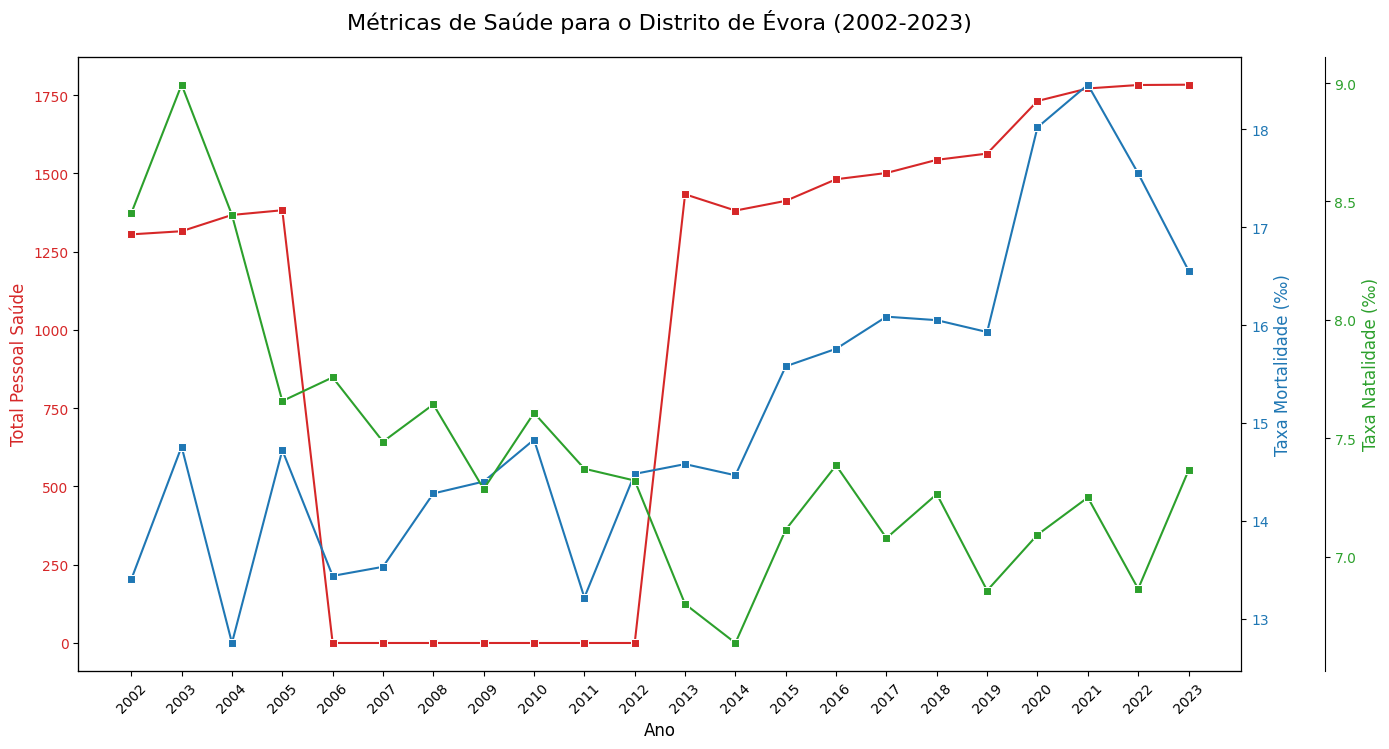

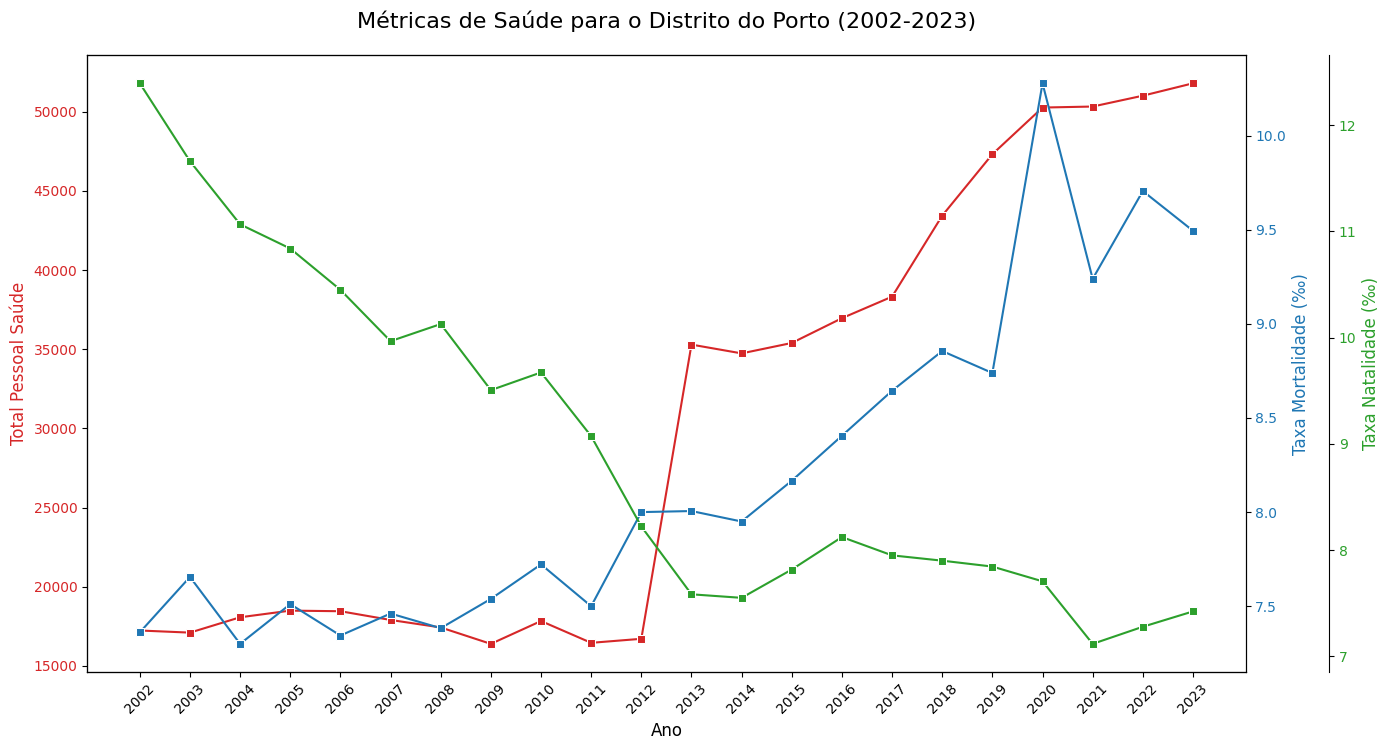

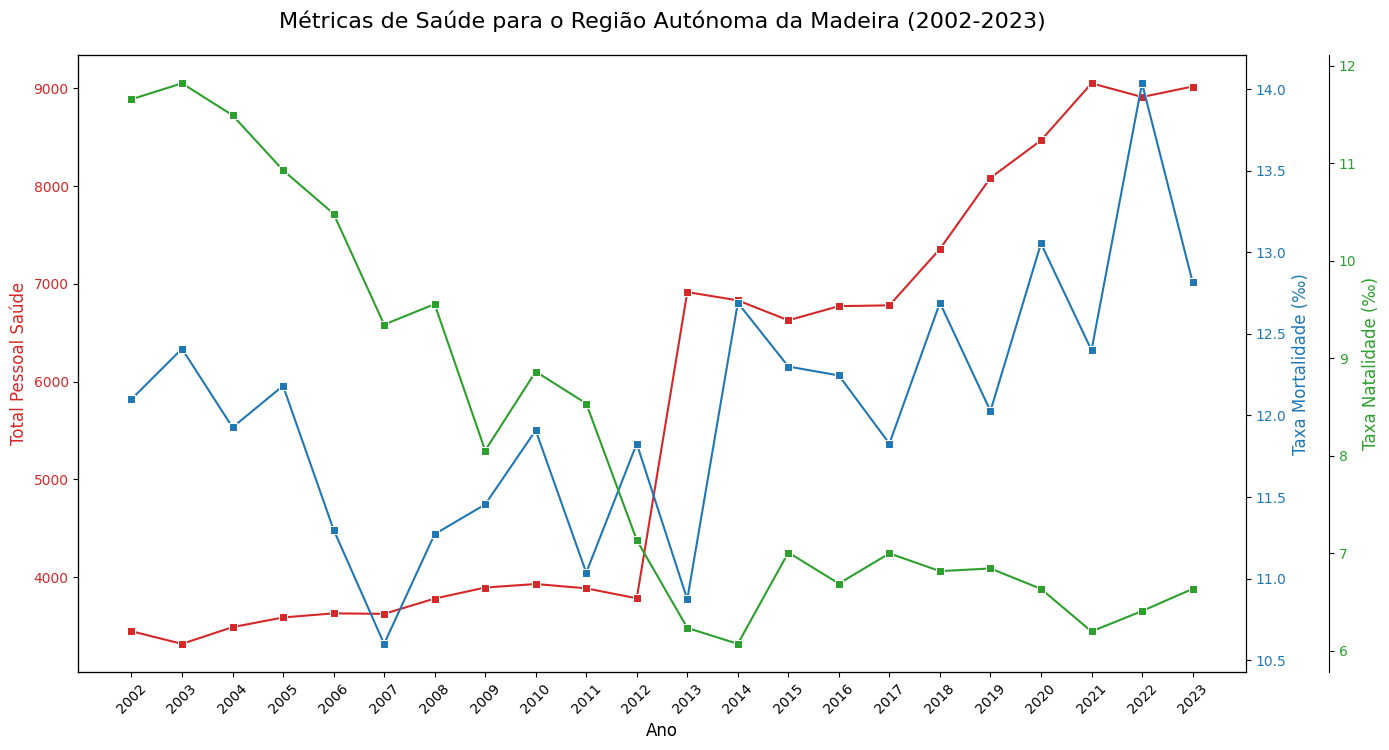

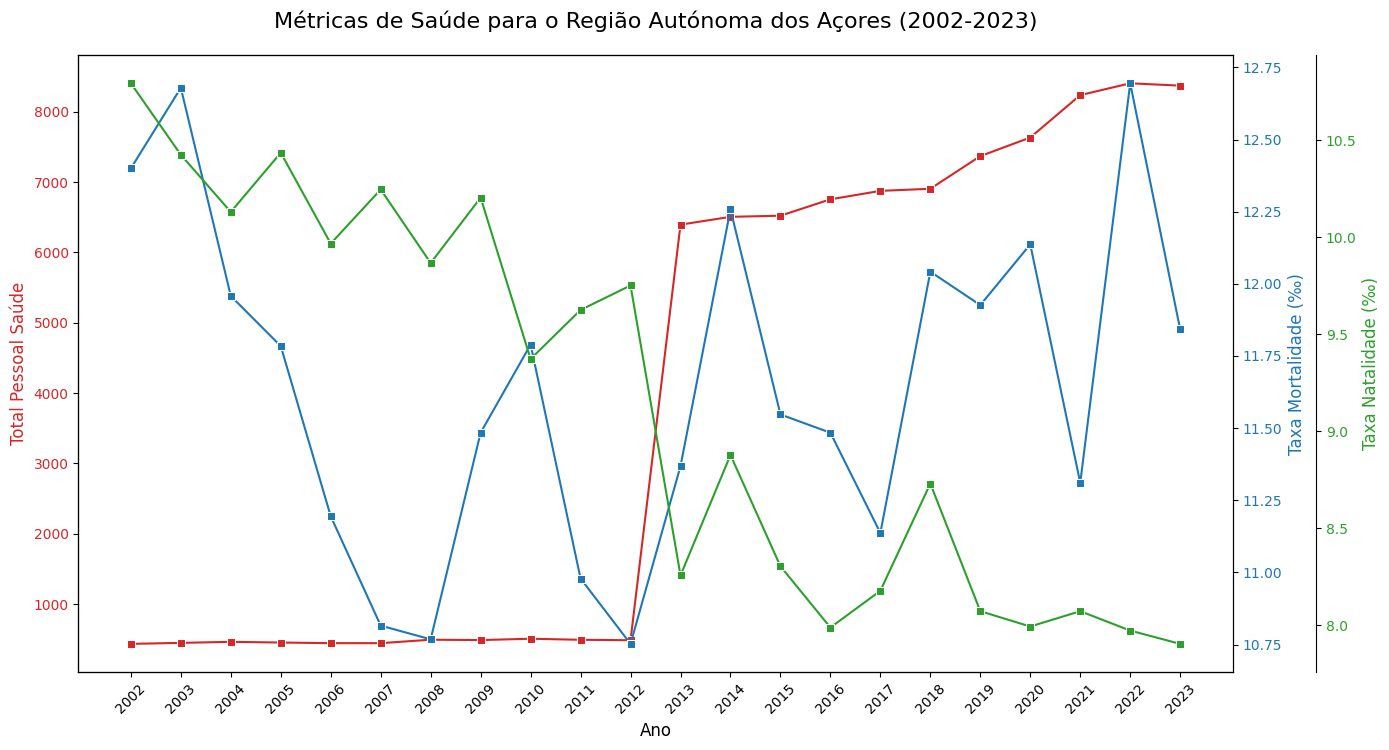

In [149]:
distritos_unicos = sorted(df_final["Distrito"].unique())

for distrito_alvo in distritos_unicos:
    df_distrito_especifico = df_final[df_final["Distrito"] == distrito_alvo].copy()

    df_distrito_especifico.sort_values("Ano", inplace=True)

    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Eixo 1: Total Pessoal Saúde
    cor_total = "tab:red"
    ax1.set_xlabel("Ano", fontsize=12)
    ax1.set_ylabel("Total Pessoal Saúde", color=cor_total, fontsize=12)
    sns.lineplot(
        data=df_distrito_especifico,
        x="Ano",
        y="Total",
        ax=ax1,
        color=cor_total,
        marker="s"
    )

    ax1.tick_params(axis="y", labelcolor=cor_total)
    anos_unicos_distrito = sorted(df_distrito_especifico["Ano"].unique())
    ax1.set_xticks(anos_unicos_distrito)
    ax1.set_xticklabels(anos_unicos_distrito, rotation=45)

    ax1.grid(False)

    # Eixo 2: Taxa Bruta de Mortalidade
    ax2 = ax1.twinx()
    cor_mortalidade = "tab:blue"
    ax2.set_ylabel("Taxa Mortalidade (‰)", color=cor_mortalidade, fontsize=12)
    sns.lineplot(
        data=df_distrito_especifico,
        x="Ano",
        y="Taxa Bruta de Mortalidade (‰)",
        ax=ax2,
        color=cor_mortalidade,
        marker="s"
    )

    ax2.tick_params(axis="y", labelcolor=cor_mortalidade)
    ax2.grid(False)

    # Eixo 3: Taxa Bruta de Natalidade
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))
    cor_natalidade = "tab:green"
    ax3.set_ylabel("Taxa Natalidade (‰)", color=cor_natalidade, fontsize=12)
    sns.lineplot(
        data=df_distrito_especifico,
        x="Ano",
        y="Taxa Bruta de Natalidade (‰)",
        ax=ax3,
        color=cor_natalidade,
        marker="s"
    )
    ax3.tick_params(axis="y", labelcolor=cor_natalidade)
    ax3.grid(False)

    # Ajustar título
    ano_min = df_distrito_especifico["Ano"].min()
    ano_max = df_distrito_especifico["Ano"].max()
    plt.title(
        f"Métricas de Saúde para o {distrito_alvo} ({ano_min}-{ano_max})",
        fontsize=16, pad=20
    )

    fig.tight_layout(rect=[0, 0.05, 1, 1])

    plt.show()
    plt.close()

#### Matriz de correlação das colunas

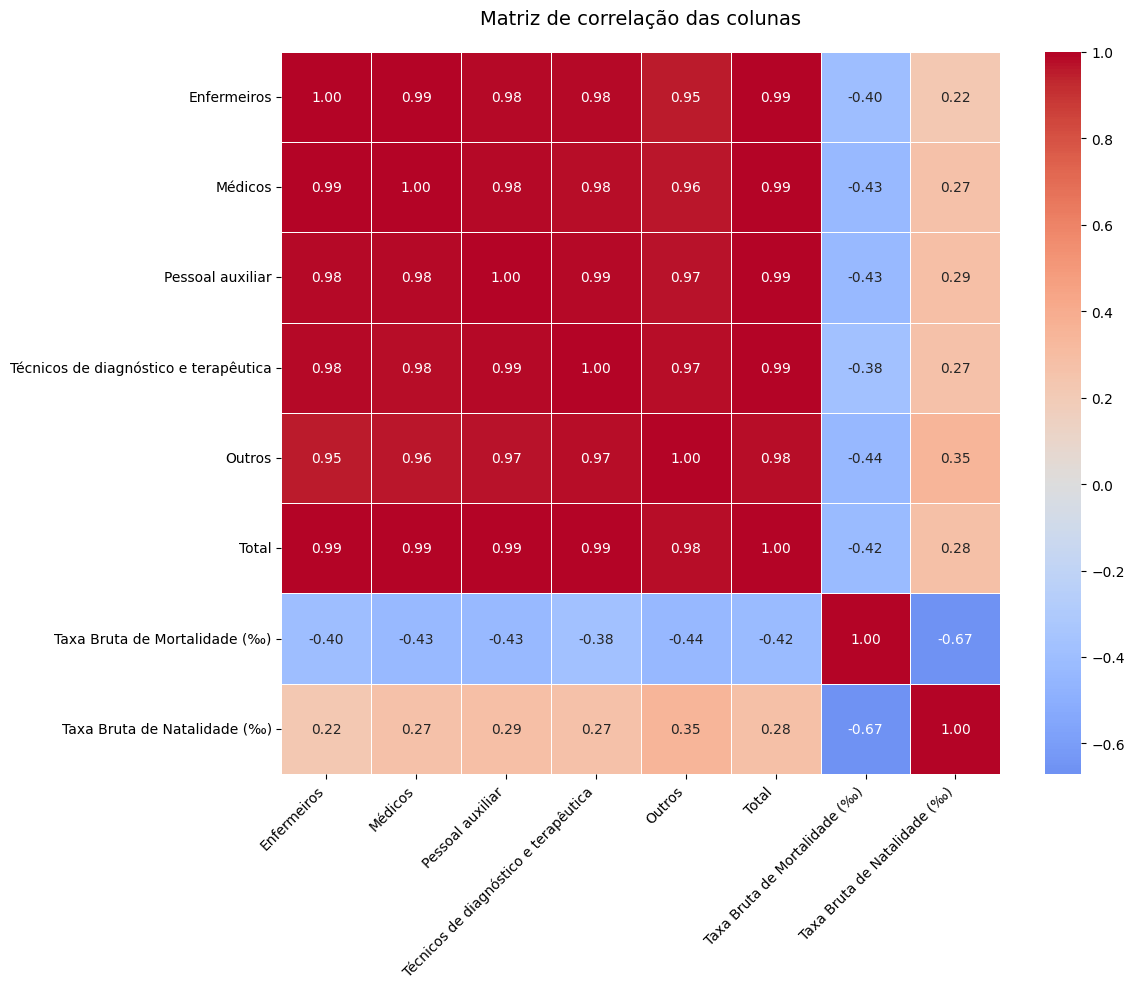

In [150]:
matriz_corelacao = df_final[[
    "Enfermeiros", "Médicos", "Pessoal auxiliar",
    "Técnicos de diagnóstico e terapêutica", "Outros", "Total",
    "Taxa Bruta de Mortalidade (‰)", "Taxa Bruta de Natalidade (‰)"
]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corelacao, 
           annot=True, 
           fmt=".2f", 
           cmap="coolwarm", 
           center=0,
           linewidths=0.5,
           annot_kws={"size": 10})

plt.title("Matriz de correlação das colunas", pad=20, fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Limpeza e processamento dos dados

#### Procura e Tratamento de outliers

In [151]:
colunas = ["Enfermeiros", "Médicos", "Pessoal auxiliar", "Técnicos de diagnóstico e terapêutica", "Outros", "Total"]

def calcular_zscores(df):
    distr_agrupados = df.groupby("Distrito")
    df_z = pd.DataFrame(index=df.index)
    for col in colunas:
        media = distr_agrupados[col].transform("mean")
        desvio = distr_agrupados[col].transform("std").replace(0, pd.NA)
        df_z[f"Z_{col.replace(' ', '_')}"] = (df[col] - media) / desvio
    return df_z

# Calcular Z-scores iniciais
df_zscores = calcular_zscores(df_final)
z_cols = df_zscores.columns
outliers_mask = df_zscores.abs().gt(3).any(axis=1)
outliers_indices = df_zscores[outliers_mask].index

# Dar print das linhas com outliers
for idx in outliers_indices:
    distrito = df_final.loc[idx, "Distrito"]
    
    #Print da informação do outlier
    print(f"\n--- Linha com outlier (índice {idx}) antes da winsorização ---")
    display(df_final.loc[idx])
    
    cols_com_outlier = []

    for col in colunas:
        z_column_name = "Z_" + col.replace(" ", "_")
        
        z_score_value = df_zscores.loc[idx, z_column_name]

        if abs(z_score_value) > 3:
            cols_com_outlier.append(col)

    print(f"Colunas com outlier: {cols_com_outlier}\n")
    
    # Aplicar winsorização para o outlier
    for col in cols_com_outlier:
        # Winsorizar o valor
        serie_distrito = df_final[df_final["Distrito"] == distrito][col].values
        winsorized_data = winsorize(serie_distrito, limits=[0.05, 0.05])

        # Substituir na posição do outlier
        pos_local = df_final[df_final["Distrito"] == distrito].index.get_loc(idx)
        novo_valor = winsorized_data[pos_local]
        df_final.at[idx, col] = novo_valor

        print(f"{col} na linha {idx} substituído por {novo_valor}")

# Procurar outravez por outliers para ver se funcionou
df_zscores_novo = calcular_zscores(df_final)
outliers_mask_novo = df_zscores_novo.abs().gt(3).any(axis=1)
outliers_indices_novo = df_zscores_novo[outliers_mask_novo].index

print("\n--- Novos outliers após winsorização ---")
if len(outliers_indices_novo) == 0:
    print("Não há mais outliers (Z-score > 3) no DataFrame.")
else:
    display(df_final.loc[outliers_indices_novo])


--- Linha com outlier (índice 235) antes da winsorização ---


Ano                                                   2013
Distrito                                 Distrito de Viseu
Enfermeiros                                         1028.0
Médicos                                              534.0
Pessoal auxiliar                                     148.0
Técnicos de diagnóstico e terapêutica                196.0
Outros                                               986.0
Total                                               2892.0
Taxa Bruta de Mortalidade (‰)                    13.270833
Taxa Bruta de Natalidade (‰)                      6.016667
Name: 235, dtype: object

Colunas com outlier: ['Outros']

Outros na linha 235 substituído por 433.0

--- Novos outliers após winsorização ---
Não há mais outliers (Z-score > 3) no DataFrame.


## Preprocessamento

#### Normalização de dados

In [152]:
df_normalizado = df_final.copy()

scaler = StandardScaler()

num_vars.remove("Ano")

cols_normalizadas = scaler.fit_transform(df_final[num_vars])

df_num_vars = pd.DataFrame(cols_normalizadas, columns=num_vars, index=df_normalizado.index)

for i in num_vars:
    df_normalizado[i] = df_num_vars[i]

distritos = {
        "Distrito de Aveiro": 0,
        "Distrito de Beja" : 1,
        "Distrito de Braga" : 2,
        "Distrito de Bragança" : 3,
        "Distrito de Castelo Branco" : 4,
        "Distrito de Coimbra": 5,
        "Distrito de Évora": 6,
        "Distrito de Faro": 7,
        "Distrito da Guarda": 8,
        "Distrito de Leiria": 9,
        "Distrito de Lisboa": 10,
        "Distrito de Portalegre": 11,
        "Distrito do Porto": 12,
        "Distrito de Santarém": 13,
        "Distrito de Setúbal": 14,
        "Distrito de Viana do Castelo": 15,
        "Distrito de Vila Real": 16,
        "Distrito de Viseu": 17,
        "Região Autónoma da Madeira": 18,
        "Região Autónoma dos Açores": 19
}

df_normalizado["Distrito"] = pd.Series(df_normalizado["Distrito"]).map(distritos).values

df_normalizado.head(10)

Ano  Distrito  Enfermeiros   Médicos  Pessoal auxiliar  \
0  2002         8    -0.581815 -0.519263         -0.583066   
1  2002         0    -0.369070 -0.356998         -0.351175   
2  2002         1    -0.511080 -0.473961         -0.527020   
3  2002         2    -0.410535 -0.329405         -0.369040   
4  2002         3    -0.485876 -0.478079         -0.504251   
5  2002         4    -0.508912 -0.482198         -0.537879   
6  2002         5     0.242605  0.303180          0.129420   
7  2002         7    -0.579375 -0.515145         -0.577812   
8  2002         9    -0.553900 -0.501554         -0.557495   
9  2002        10     1.361885  1.906060          1.946366   

   Técnicos de diagnóstico e terapêutica    Outros     Total  \
0                              -0.529016 -0.567689 -0.568540   
1                              -0.378612 -0.343627 -0.362036   
2                              -0.485566 -0.478429 -0.504447   
3                              -0.407579 -0.359567 -0.378604   
4                              -0.473311 -0.487537 -0.492817   
5                              -0.502278 -0.498922 -0.513065   
6                               0.134992  0.408256  0.252455   
7                              -0.530131 -0.571788 -0.566532   
8                              -0.510077 -0.520782 -0.540175   
9                               1.923135  2.841516  1.939042   

   Taxa Bruta de Mortalidade (‰)  Taxa Bruta de Natalidade (‰)  
0                       0.733558                     -0.208680  
1                      -1.179188                      1.877928  
2                       1.125067                      0.045106  
3                      -1.426341                      2.472989  
4                       0.410966                     -0.455416  
5                       1.335218                     -0.415938  
6                       0.052622                      0.768395  
7                      -0.231193                      1.164406  
8                      -0.317798                      0.886828  
9                      -0.947127                      2.245110

# Análise Descritiva

#### Escolha do número ideal de clusters via Método do Cotovelo

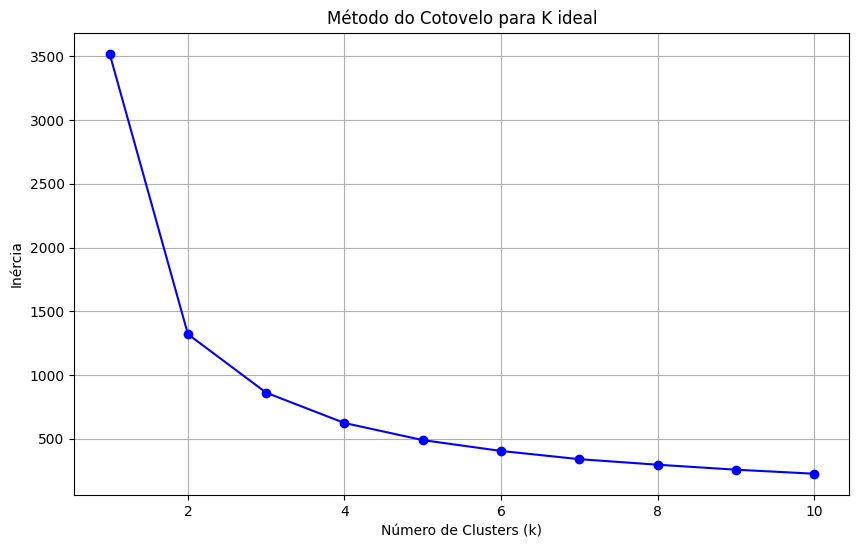

In [158]:
features = ['Enfermeiros', 'Médicos', 'Pessoal auxiliar', 'Técnicos de diagnóstico e terapêutica', 'Outros', 'Total', 'Taxa Bruta de Mortalidade (‰)', 'Taxa Bruta de Natalidade (‰)']

def encontrar_k(inercias, k_range):
    prim_deriv = np.diff(inercias)
    second_deriv = np.diff(prim_deriv)
    elbow_index = np.argmax(second_deriv) + 1
    
    return k_range[elbow_index]

X = df_normalizado[features]

inercias = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inercias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para K ideal')
plt.grid(True)
plt.show()


k = encontrar_k(inercias, k_range)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_final['Cluster_Kmeans'] = kmeans.fit_predict(X)

#### Aplicação de K-Means e Agglomerative Clustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=k)
df_final['Cluster_Agg'] = agg.fit_predict(X)

df_normalizado['Cluster_Kmeans'] = df_final['Cluster_Kmeans']

#### Estatísticas descritivas por cluster

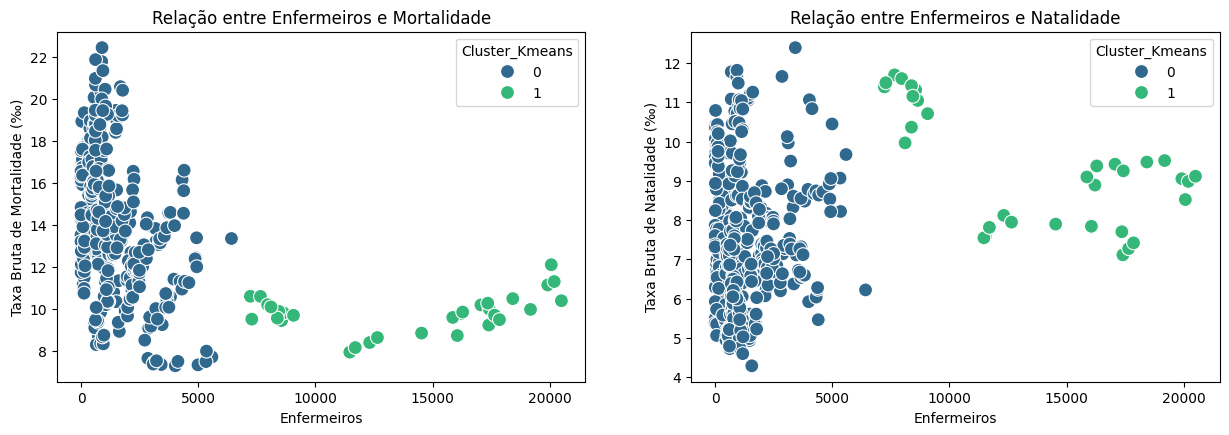

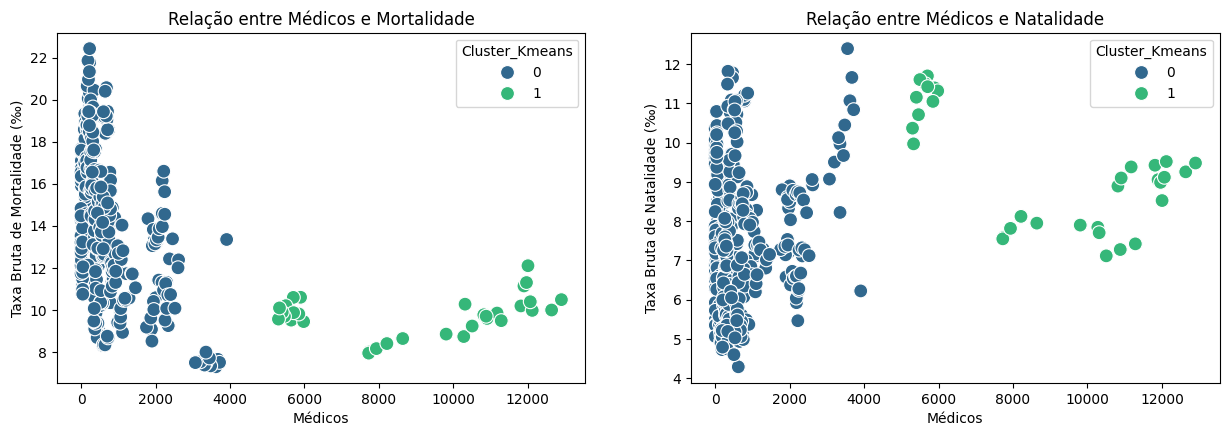

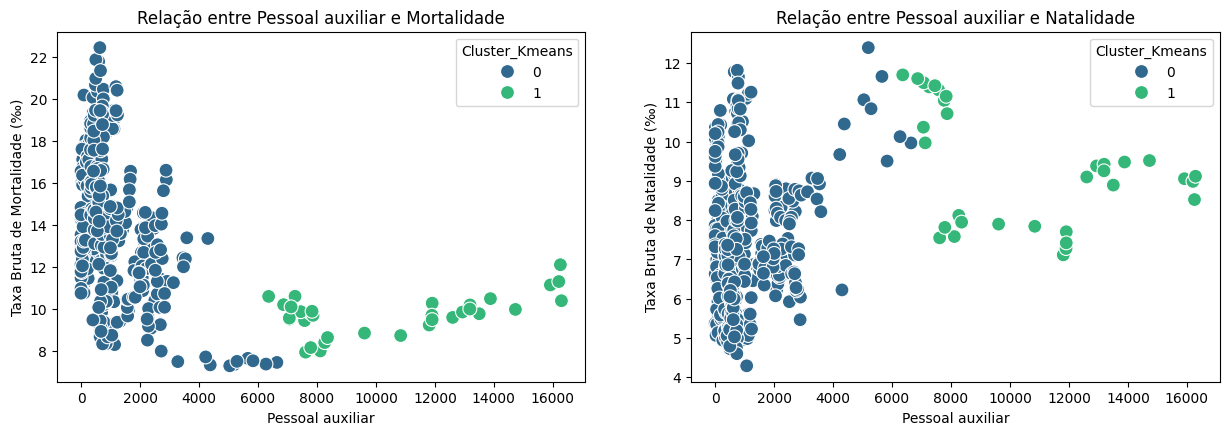

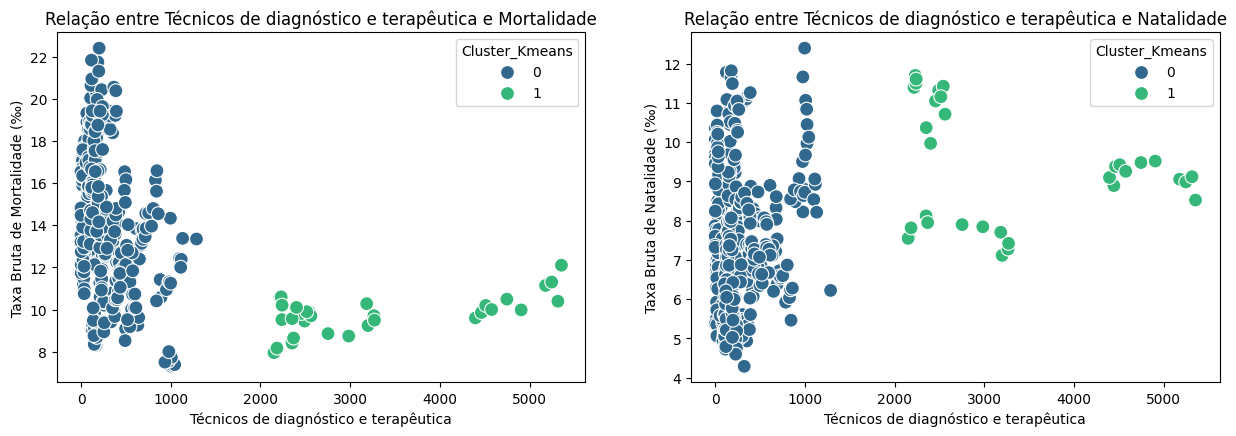

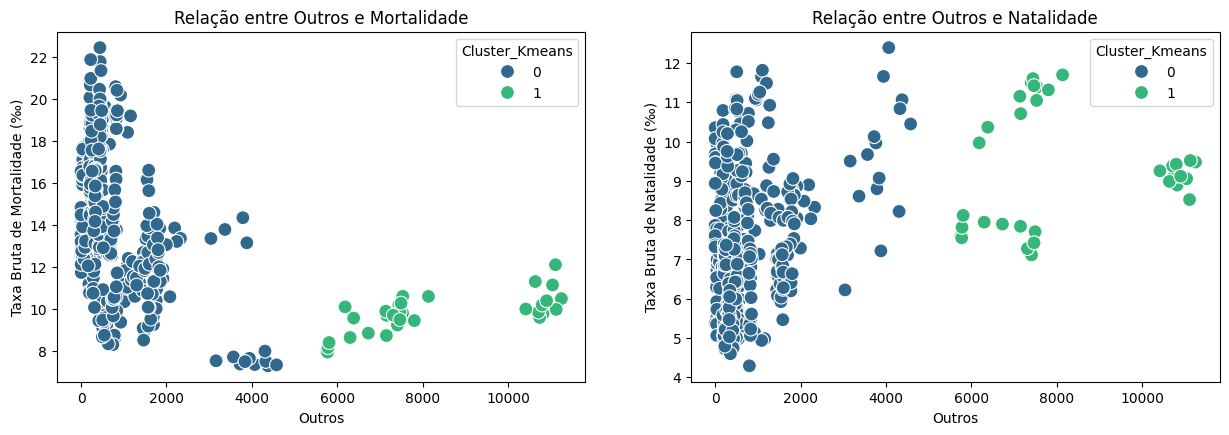

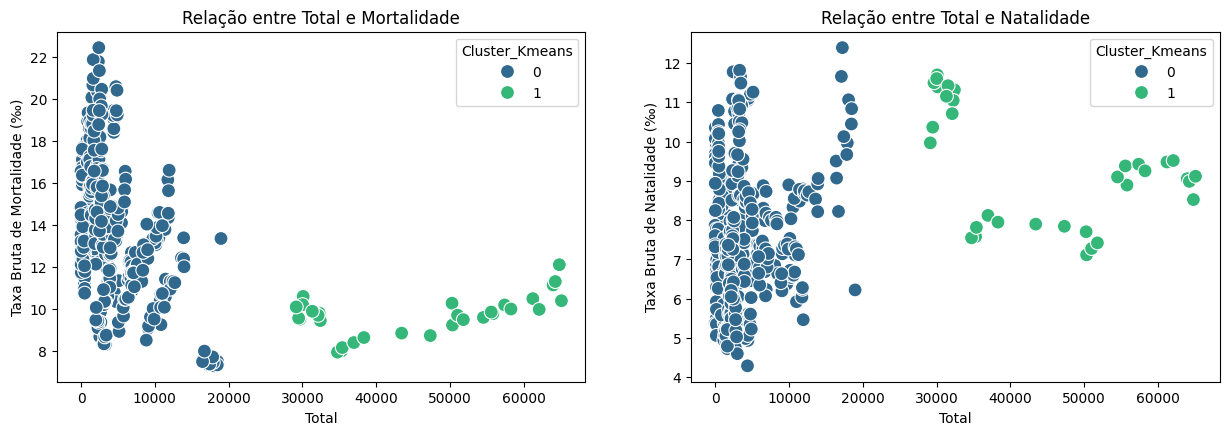

In [160]:
for categoria in features:
    if categoria not in ['Taxa Bruta de Mortalidade (‰)', 'Taxa Bruta de Natalidade (‰)']:

        # Mortalidade
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 2, 1)
        sns.scatterplot(
            x=categoria,
            y='Taxa Bruta de Mortalidade (‰)', 
            hue='Cluster_Kmeans', 
            data=df_final,
            palette='viridis',
            s=100
        )
        plt.title(f'Relação entre {categoria} e Mortalidade')

        # Natalidade
        plt.subplot(2, 2, 2)
        sns.scatterplot(
            x=categoria, 
            y='Taxa Bruta de Natalidade (‰)', 
            hue='Cluster_Kmeans', 
            data=df_final,
            palette='viridis',
            s=100
        )
        plt.title(f'Relação entre {categoria} e Natalidade')